# **Estudio Framingham de riesgo cardiovascular**

### **ABSTRACT**

Una pequeña ciudad en Massachusetts, Framingham, donde en 1948 un grupo de científicos decidió revelar los misterios del corazón humano. Así nació el Estudio de Framingham, una investigación que ha seguido a miles de personas a lo largo de tres generaciones, para relacionar datos y factores de riesgo con el fin de contribuir a la prevención de enfermedad cardiovascular (ECV).

En este estudio, nos sumergimos en los datos del Framingham Heart Study extraído de Kaggle, con el objetivo de descubrir patrones ocultos y relaciones significativas que puedan predecir ECV a 10 años. Comenzamos nuestro viaje con un Análisis Exploratorio de Datos (EDA), utilizando herramientas de visualización para dar luz a patrones ocultos y relaciones entre variables. Identificamos valores nulos y outliers, asegurándonos de que nuestros datos logren la mayor precisión y depuración posible para el buen funcionamiento de los modelos predictivos.

Nutridos del EDA, nos aventuramos en el mundo del machine learning. Probamos diferentes modelos, cada uno con su propio enfoque para resolver la predicción. Evaluamos su precisión y capacidad predictiva, buscando el modelo que pueda prever con mayor certeza quién está en riesgo de sufrir una enfermedad cardiovascular.

Los hallazgos de este estudio no solo nos acercan a comprender mejor los factores de riesgo, sino que también demuestran el poder de la inteligencia artificial en la medicina preventiva. Con cada predicción acertada, damos un paso más hacia un futuro donde las enfermedades del corazón puedan ser detectadas y tratadas a tiempo.

### **AUDIENCIA OBJETIVO**

El presente proyecto está destinado a los profesionales de la medicina cardiovascular, quienes podrían beneficiarse de la inteligencia artificial para predecir ECV y tomar acciones terapéuticas e higiénico - dietéticas para los pacientes con screening de riesgo. 

### **Key Features**

##### **Datos demográficos**: género, edad y nivel educativo.
##### **Indicadores de salud**: tabaquismo, presión arterial, niveles de colesterol, índice de masa corporal (BMI), y niveles de glucosa.
##### **Historia clínica**: prevalencia de ACV, hipertensión arterial, y diabetes.
##### **Variable target**: Riesgo de desarrollar ECV a 10 años
##### **Dataset metadata**: el dataset original cuenta 4240 registros x 16 campos (variables). Del total de registros, 582 presentan al menos un valor nulo. Se decide eliminar los registros con valores nulos, quedando un total de **3658 registros (13.72% de pérdida de registros)**. 


In [1]:
# Importo las primeras librerias que utilizaré

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'https://github.com/matisolica/Proyecto-final-DS2/raw/refs/heads/main/framingham_heart_study.csv'
df = pd.read_csv(data, sep=',') # Importo el dataset
df.head() # Muestro las primeras 5 filas

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

### **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

In [3]:
df.shape # El dataset original tiene 4240 filas y 16 columnas

(4240, 16)

In [4]:
df.isnull().sum() # Verifico si hay valores nulos

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Para evitar perder un porcentaje significativo de los datos, reemplazaré los nulos por la media de cada columna

In [5]:
df.fillna(df.mean(), inplace=True) # Reemplazo los valores nulos por la media de la columna
df.isnull().sum() # Verifico si hay valores nulos

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
df.shape # El dataset conserva las 4240 filas y 16 columnas

(4240, 16)

In [7]:
df.columns # Muestro el nombre de las columnas del df.

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df.rename(columns={'male' : 'sex'}, inplace=True) # Cambio el nombre de la columna male por sex.

In [9]:
df.info() # Información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### Operacionalización de las variables

A continuación, se describen las variables incluídas en el dataset, con el fin de operacionalizar cada una y comprender su significado:

##### **sex**: describe el sexo de cada unidad de análisis. Un valor igual a 0 define un individuo de sexo femenino, mientras que 1 describe a un individuo de sexo masculino.
##### **age**: describe la edad de cada unidad de análisis.
##### **education**: describe la educación del individuo unidad de análisis, en un rango de 1 a 4. Si bien no encontré la descripción de la variable en la publicación de Kaggle ni en algunos notebooks explorados que utilizaron el mismo dataset, infiero desde un criterio de ponderación que 1 es el nivel educativo más bajo y 4 el más alto. 
##### **currentSmoker**: describe el hábito tabaquista de la unidad de análisis. 0 indica que no es tabaquista, mientras que 1 indica que sí lo es. 
##### **cigsPerDay**: describe la cantidad de cigarrillos por día que fuma el individuo unidad de análisis.
##### **BPMeds**: describe si la unidad de análisis toma medicamentos para control de la presión arterial. 0 indica que no toma medicamentos para controlar la presión arterial, 1 que sí los toma. 
##### **prevalentStroke**: indica si la unidad de análisis ha padecido algún evento de accidente cerebrovascular (ACV). 0 indica que no lo ha tenido, 1 indica que sí lo tuvo. 
##### **prevalentHyp**: indica si la unidad de análisis es hipertenso. 0 indica que no es hipertenso, 1 indica que sí lo es. 
##### **diabetes**: indica si la unidad de análisis es diabético. 0 indica que no es hipertenso, 1 indica que sí lo es.
##### **totChol**: indica los niveles de colesterol total dosado en análisis de laboratorio de cada unidad de análisis, en miligramos por decilitro (mg/dL). 
##### **sysBP**: indica la presión arterial sistólica de la unidad de análisis, en mmHg.
##### **diaBP**: indica la presión arterial diastólica de la unidad de análisis, en mmHg.
##### **BMI**: indica el índice de masa corporal de la unidad de análisis.
##### **heartRate**: indica la frecuencia cardiaca de la unidad de análisis, en latidos/minuto.
##### **glucose**: indica los niveles de glucosa en sangre de la unidad de análisis, en miligramos por decilitro (mg/dL)
##### **TenYearCHD**: indica la prevalencia a 10 años de desarrollar ECV. 0 indica que no ha desarrollado ECV, 1 indica que sí ha desarrollado. 

In [10]:
df.describe().T.round(2) # Resumen estadístico

count    mean    std     min     25%     50%     75%    max
sex              4240.0    0.43   0.50    0.00    0.00    0.00    1.00    1.0
age              4240.0   49.58   8.57   32.00   42.00   49.00   56.00   70.0
education        4240.0    1.98   1.01    1.00    1.00    2.00    3.00    4.0
currentSmoker    4240.0    0.49   0.50    0.00    0.00    0.00    1.00    1.0
cigsPerDay       4240.0    9.01  11.88    0.00    0.00    0.00   20.00   70.0
BPMeds           4240.0    0.03   0.17    0.00    0.00    0.00    0.00    1.0
prevalentStroke  4240.0    0.01   0.08    0.00    0.00    0.00    0.00    1.0
prevalentHyp     4240.0    0.31   0.46    0.00    0.00    0.00    1.00    1.0
diabetes         4240.0    0.03   0.16    0.00    0.00    0.00    0.00    1.0
totChol          4240.0  236.70  44.33  107.00  206.00  234.00  262.00  696.0
sysBP            4240.0  132.35  22.03   83.50  117.00  128.00  144.00  295.0
diaBP            4240.0   82.90  11.91   48.00   75.00   82.00   90.00  142.5
BMI              4240.0   25.80   4.07   15.54   23.08   25.41   28.03   56.8
heartRate        4240.0   75.88  12.02   44.00   68.00   75.00   83.00  143.0
glucose          4240.0   81.96  22.83   40.00   72.00   80.00   85.00  394.0
TenYearCHD       4240.0    0.15   0.36    0.00    0.00    0.00    0.00    1.0

### Primeros insights:

- La edad media es de 49.55 años, con una desviación estándar de 8.56 años
- Prevalencia de tabaquismo del 50%
- Prevalencia de hipertensión arterial del 31%, pero solo el 3% consume medicación para la hipertensión arterial. 
- Media de colesterol total de 236.85 mg/dL con una desviación estándar de 44.1 mg/dL, lo que evidencia un factor de riesgo significativamente presente en la muestra. (VN <200 mg/dL)
- La media de IMC es de 25.78, con una desviación estándar de 4.07, lo que evidencia una prevalencia de sobrepeso / obesidad significativa. Condice con el perfil epidemiológico de Estados Unidos. 

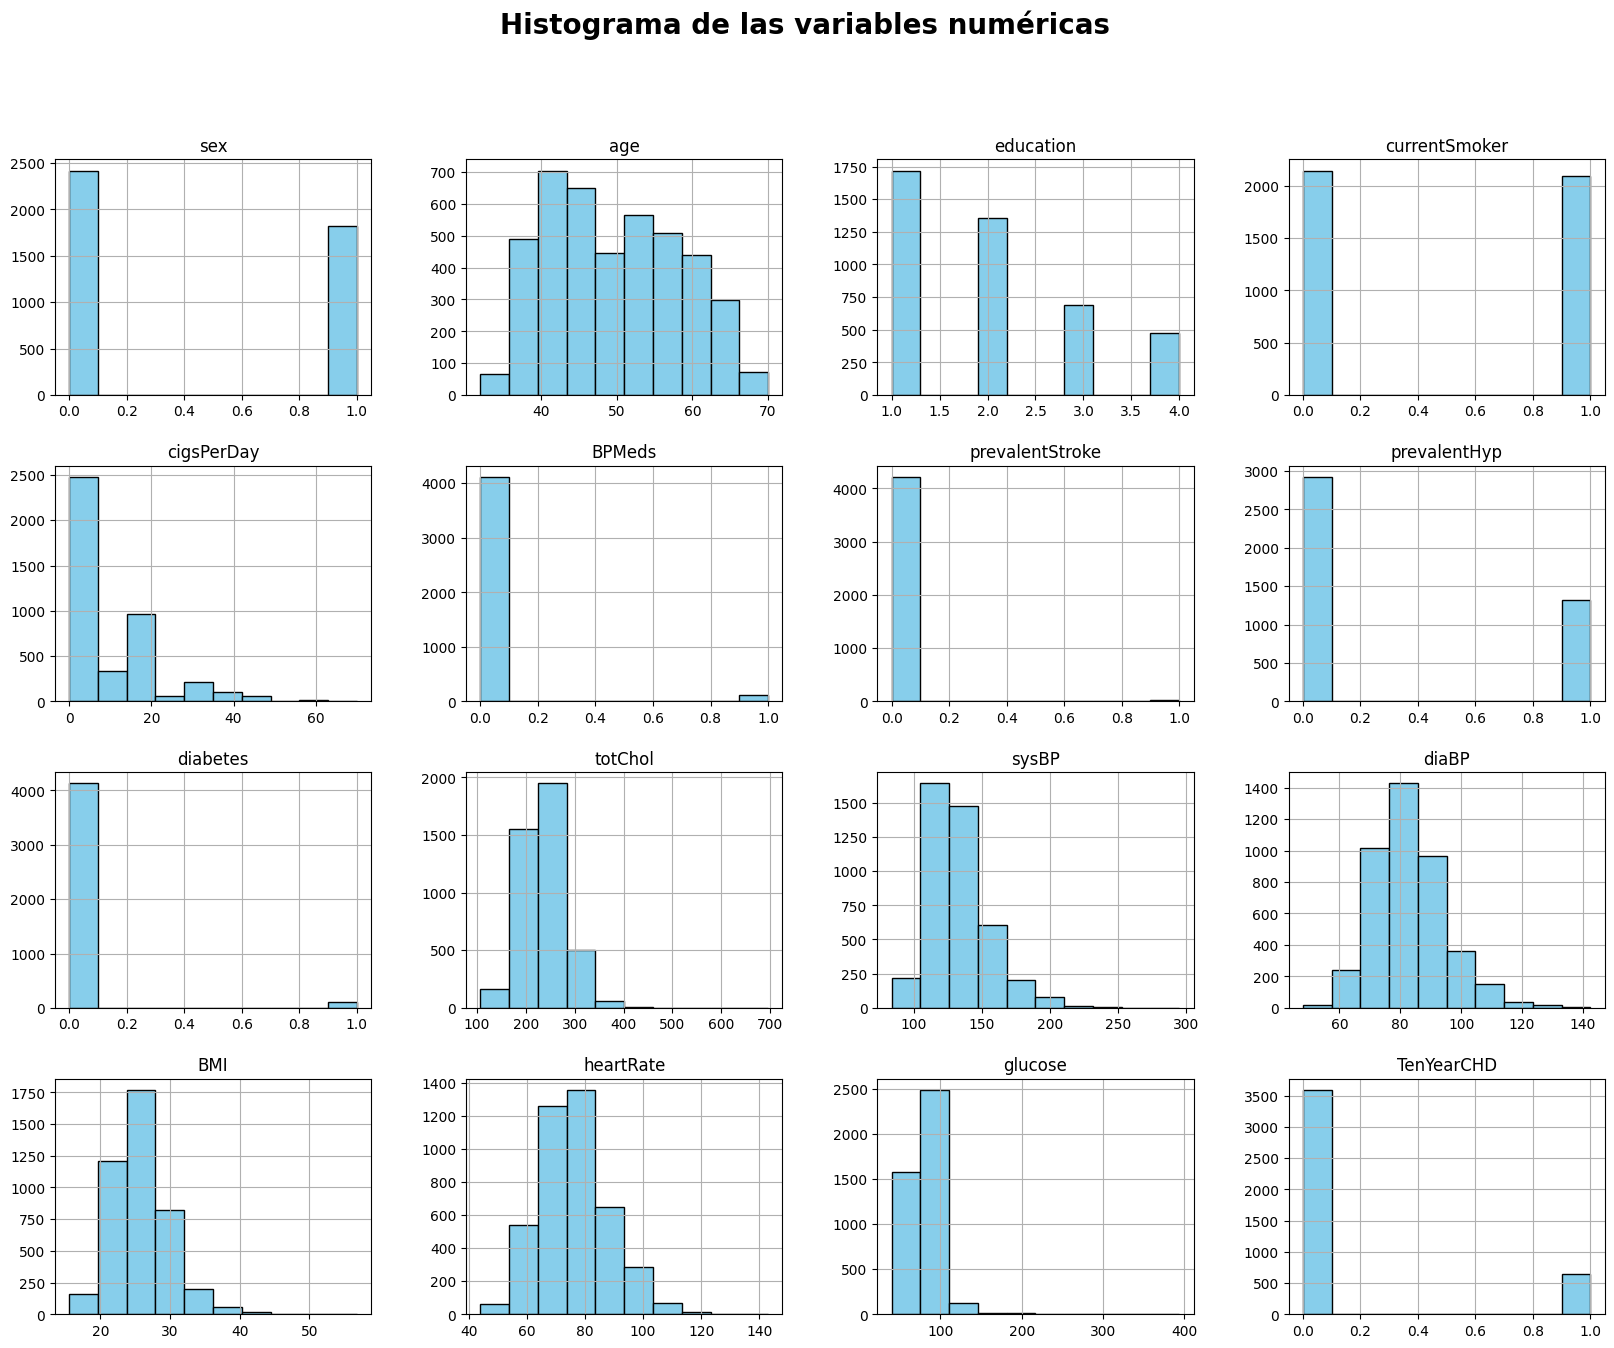

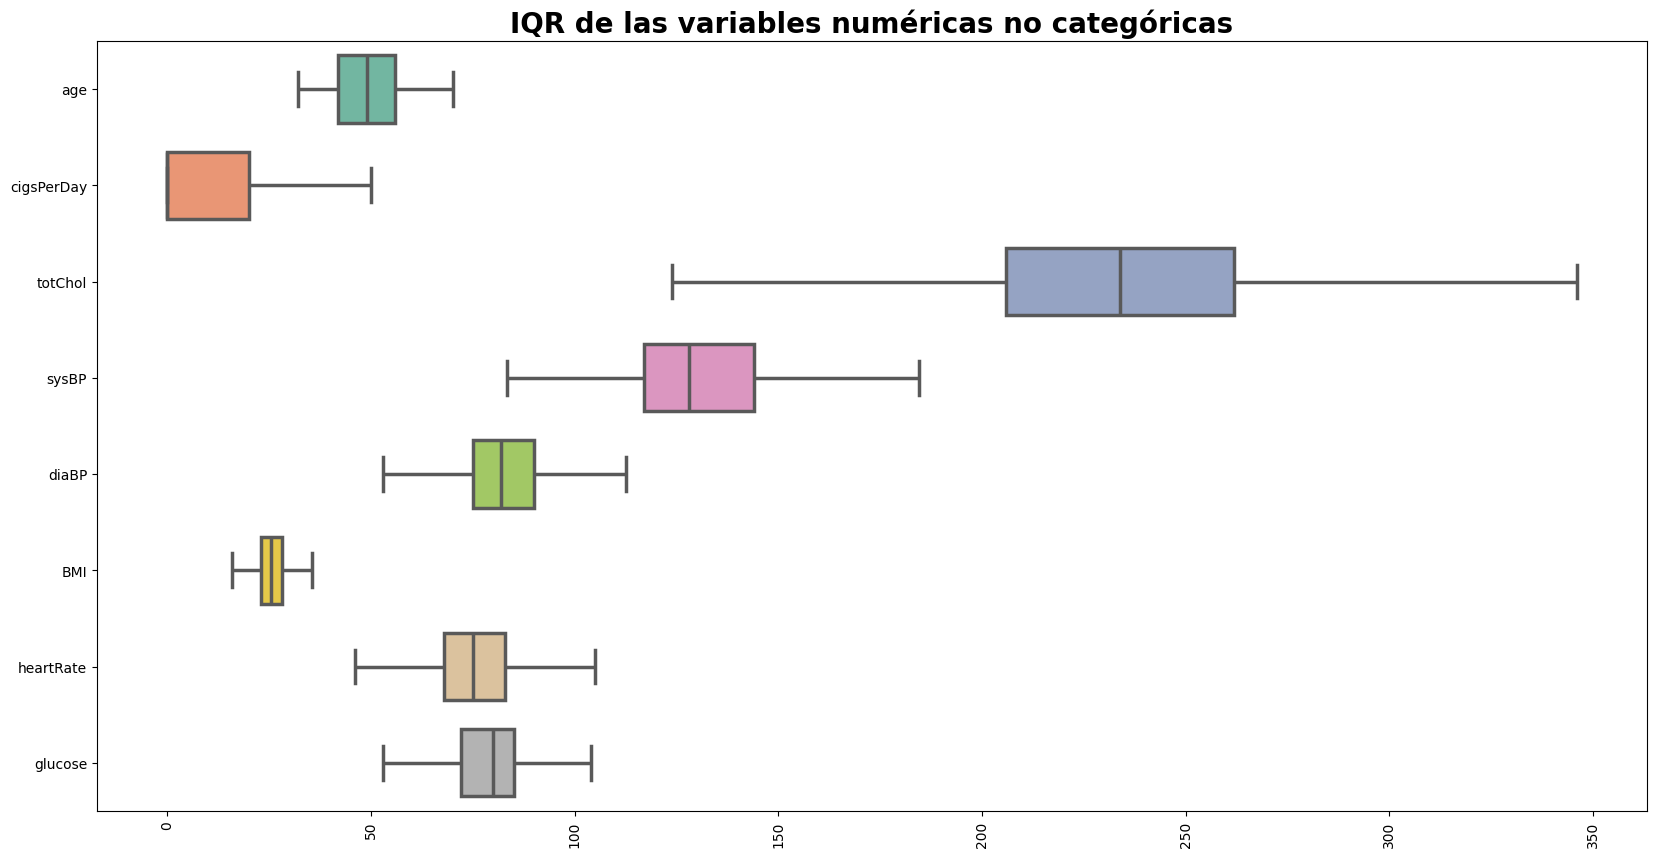

In [11]:
# Histograma de las variables numéricas
df.hist(bins=10, figsize=(20, 15), color='skyblue', ec='black')
plt.suptitle('Histograma de las variables numéricas', fontsize=20, fontweight='bold')

plt.show()

# Boxplot de las variables numéricas
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']], orient='h', palette='Set2', linewidth=2.5, width=0.7, fliersize=10, showfliers=False)
plt.xticks(rotation=90)
plt.title('IQR de las variables numéricas no categóricas', fontsize=20, fontweight='bold')

plt.show()

### Insights:

- Edad: el IQR es bastante acotado, concentrandose alrededor de los 50 años +/- unos 6 años.
- Si bien la prevalencia de tabaquismo está en un 50%, la cantidad de cigarrillos por día se concentra en un rango de 0 a 7 (más de la mitad de la muestra).
- El IQR del colesterol total en sangre se encuentra por encima de los valores normales. Asimismo, la variación es muy amplia, lo que muestra variabilidad de los datos por fuera del IQR. 
- La mayor parte de Q3 de la presión arterial sistólica se encuentra por encima de los 130 mmHg, lo que respalda la conclusión de la prevalencia de la hipertensión arterial en la muestra de estudio. 
- El IQR del IMC es muy pequeño, y a su vez en un rango por encima de los valores normales, lo que refleja la prevalencia de sobrepeso/obesidad de la muestra de estudio. 
- La variable target TenYearCHD muestra clases desbalanceadas, lo que será un factor importante a considerar en la elección de los modelos, evaluación de rendimiento y ajuste de hiperparámetros.

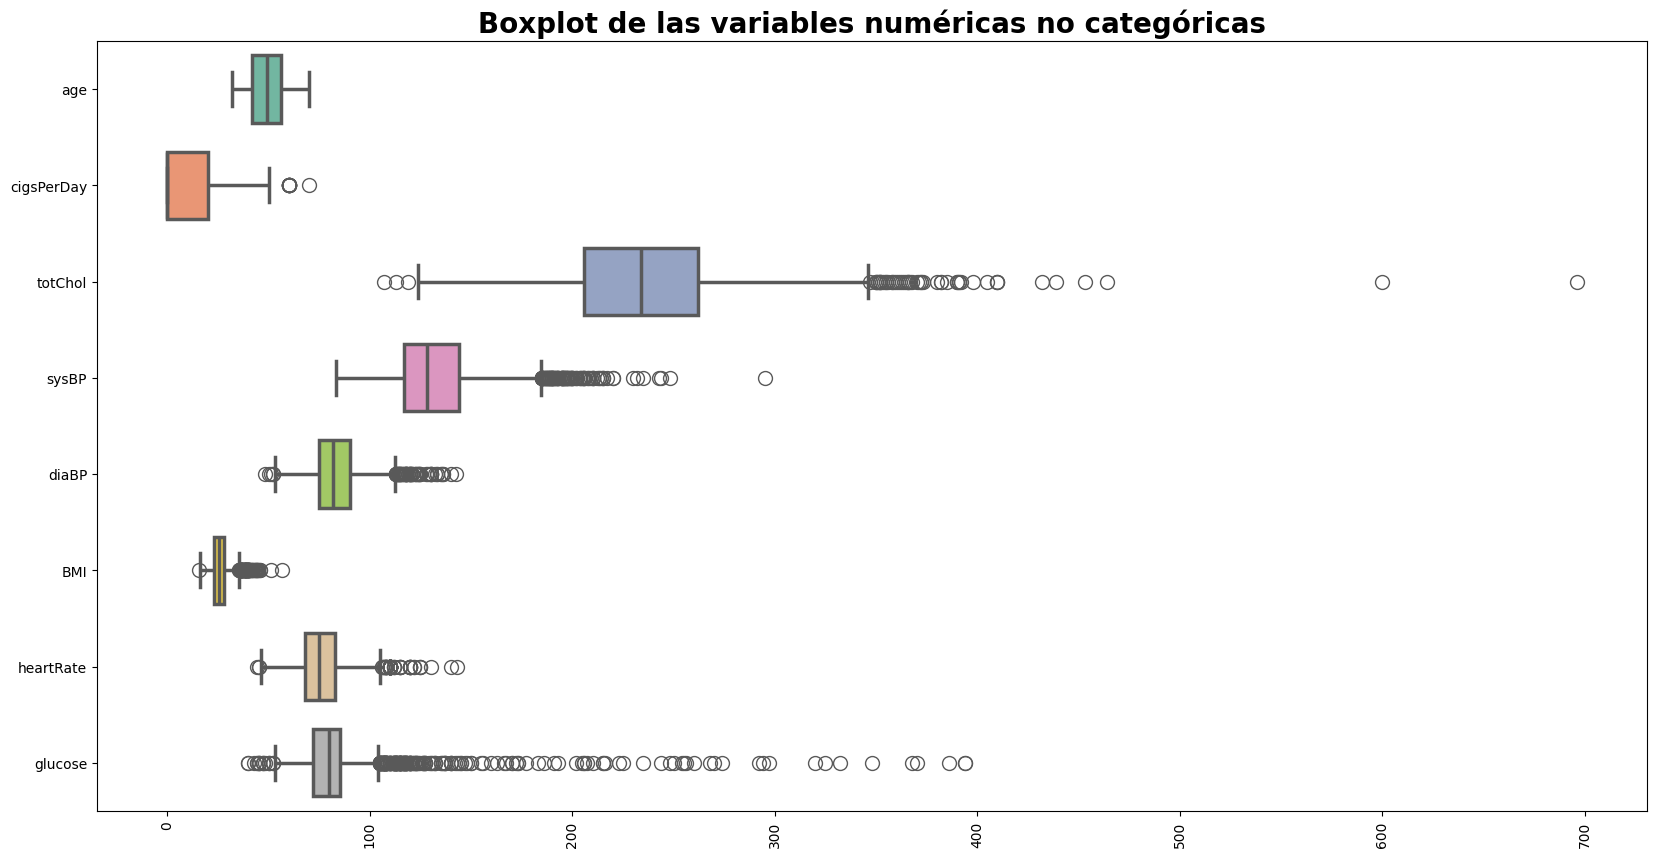

In [12]:
# Boxplot para identificar outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']], orient='h', palette='Set2', linewidth=2.5, width=0.7, fliersize=10)
plt.xticks(rotation=90)
plt.title('Boxplot de las variables numéricas no categóricas', fontsize=20, fontweight='bold')

plt.show()

### Tratamiento de outliers

En virtud de lo visualizado en el gráfico anterior, se identifican outliers significativos en totChol, sysBP y glucose. Sin embargo, dado que son clínicamente significativos aún los mantendremos. Se les dará tratamiento posterior en virtud del modelo de machine learning que seleccione. 

### Heatmap de correlación de los features

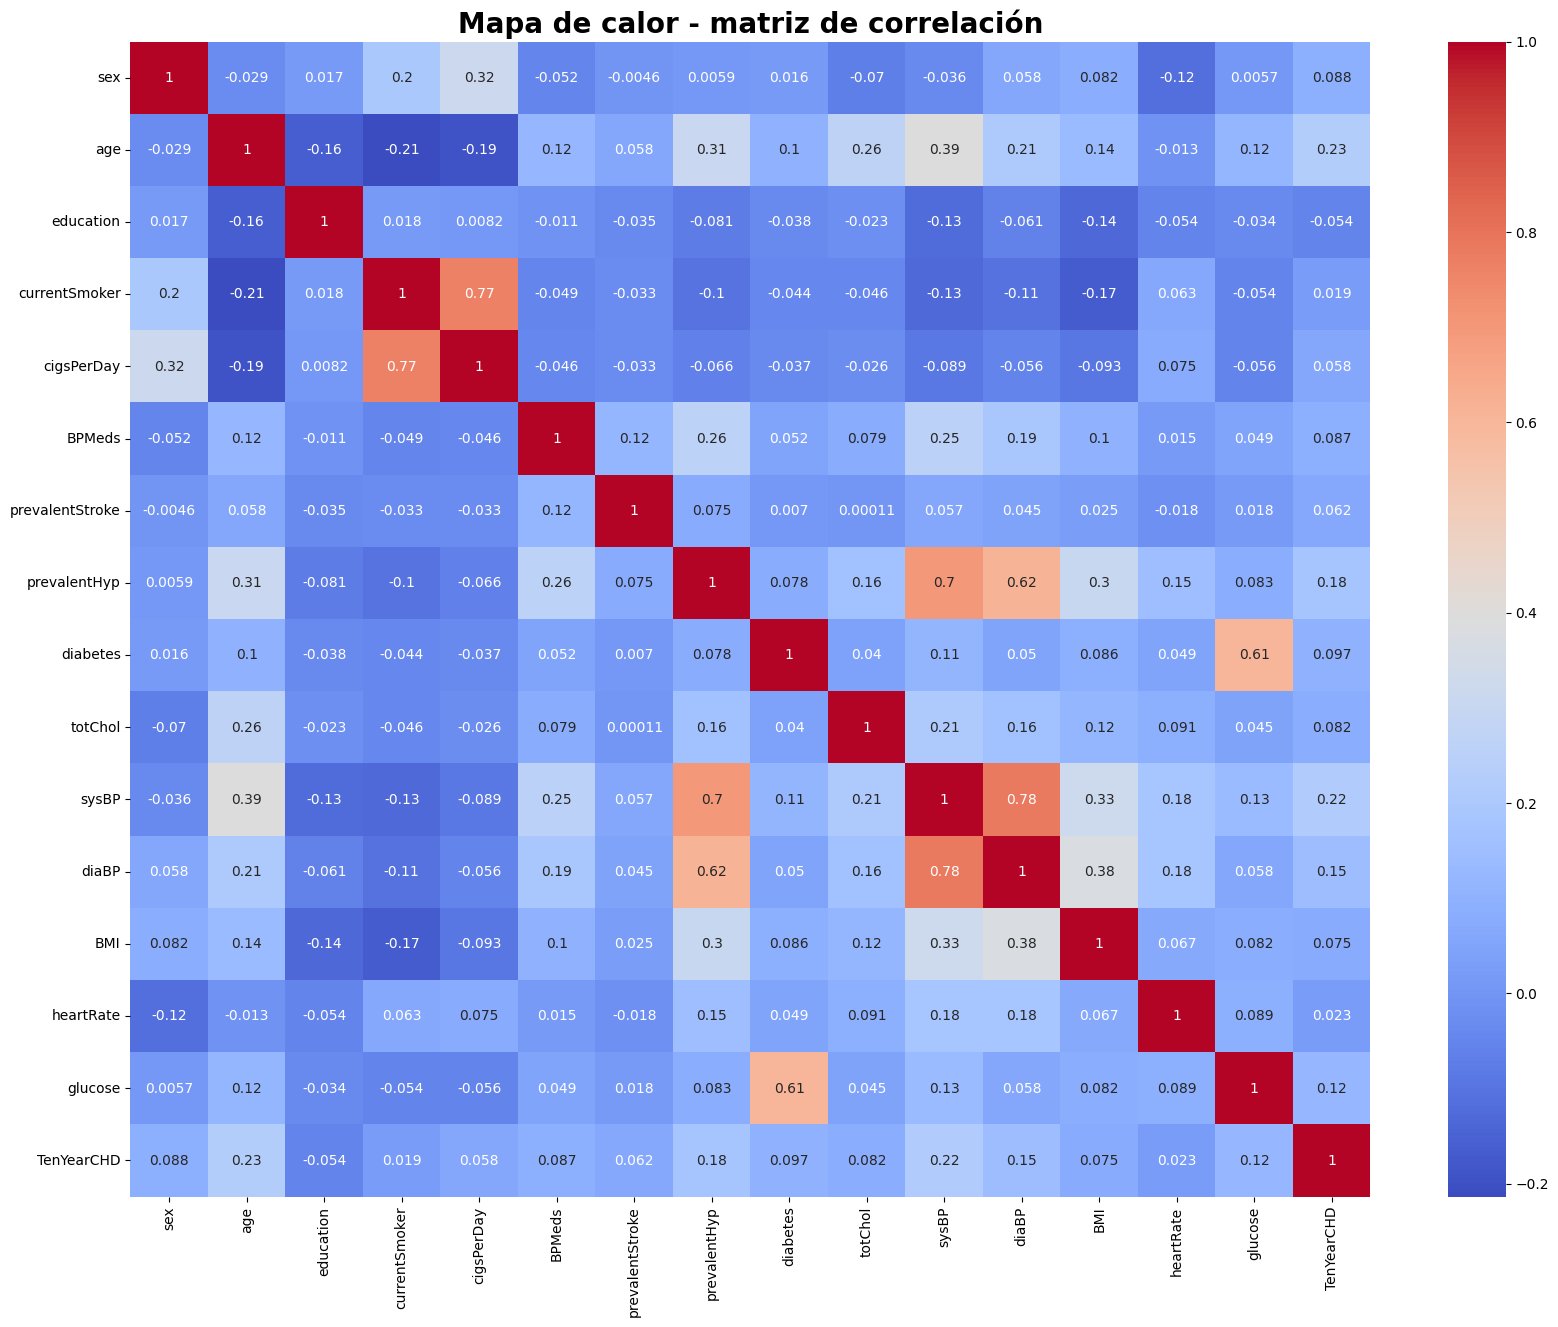

In [13]:
# Matriz de correlación
corr_matrix = df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor - matriz de correlación', fontsize=20, fontweight='bold')

plt.show()

### Pairplot de los features con hue en la variable target

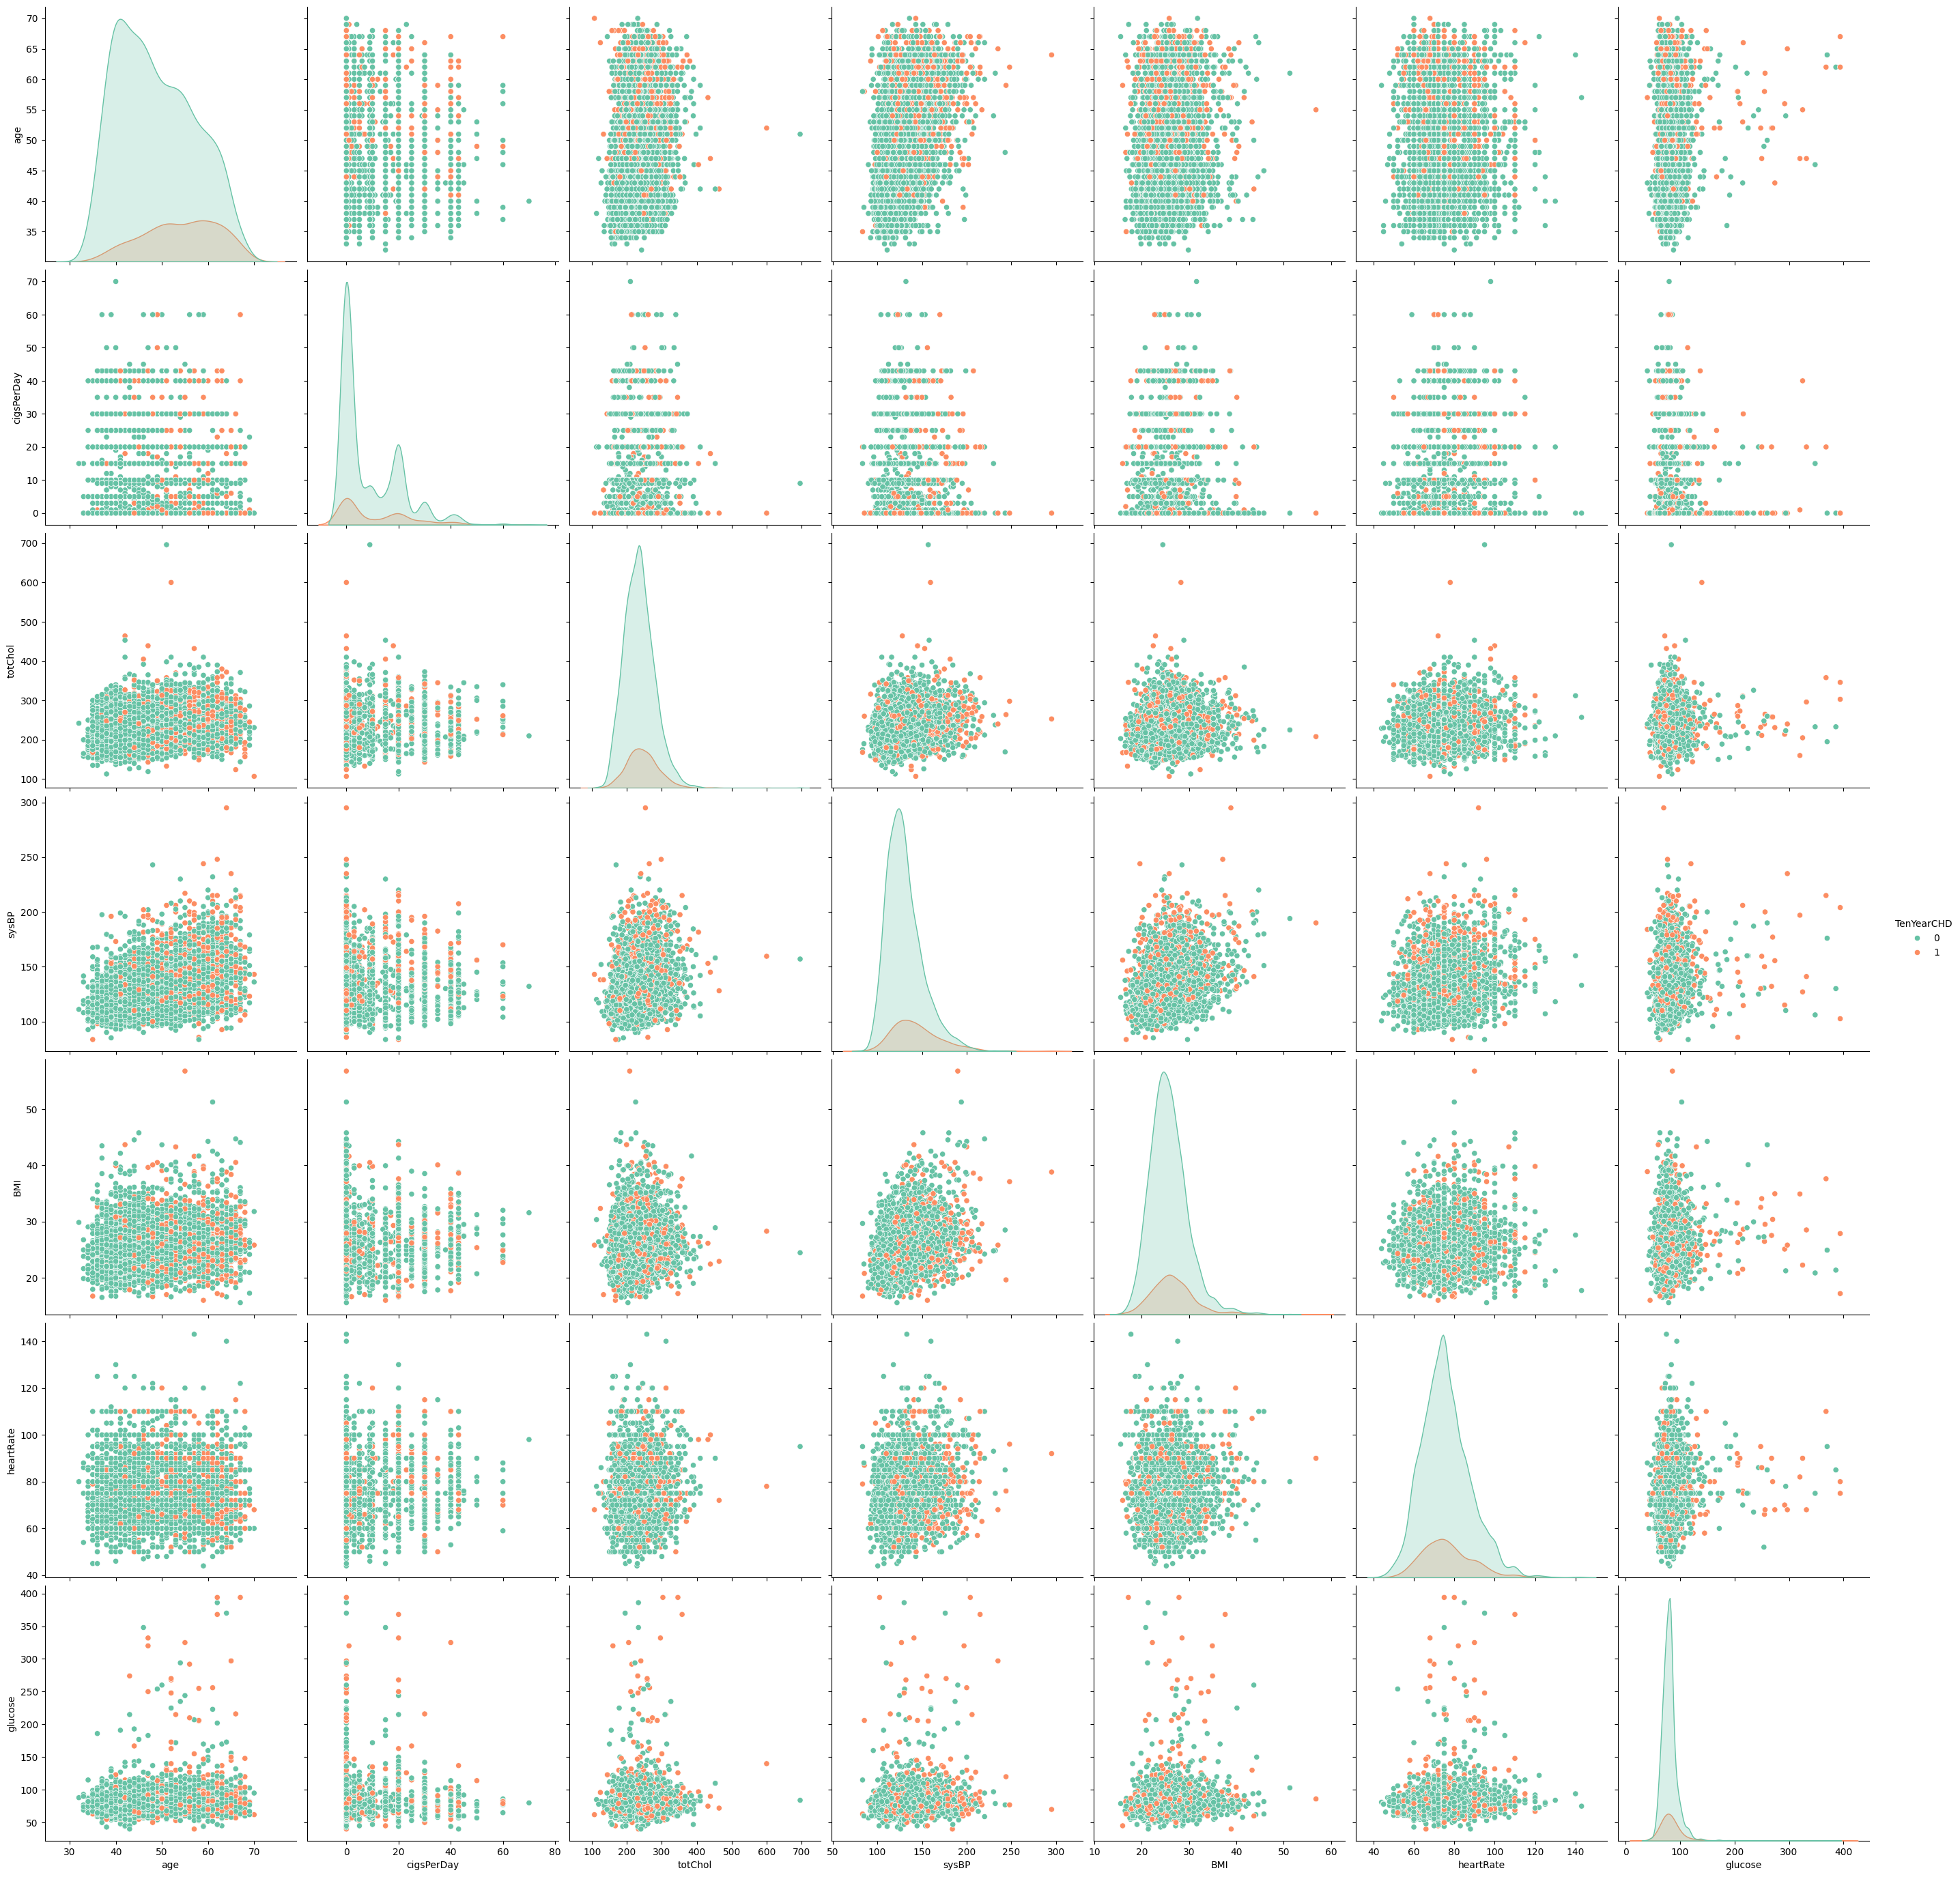

In [14]:
sns.pairplot(df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']], hue='TenYearCHD', height=4, palette='Set2')

### Insights:

- Edad: en la distribución de frecuencias por ECV a 10 años, se observa un incremento de la frecuencia de individuos que desarrollan ECV directamente proporcional a la edad, lo que podría sugerir una correlación positiva y un factor de riesgo para el desarrollo de ECV. 
- Correlación positiva fuerte entre la presión arterial sistólica y diastólica, lo que me permitiría prescindir de uno de los features. Dropearé diaBP. 
- La educación no es un feature que sea médicamente significativo en la prevalencia de ECV. Dropearé education. 

Con el objetivo de una mejor visualización y evidenciar la distribución normal de la muestra por grupos etarios, optimizo la visualización de los histogramas por rangos. 

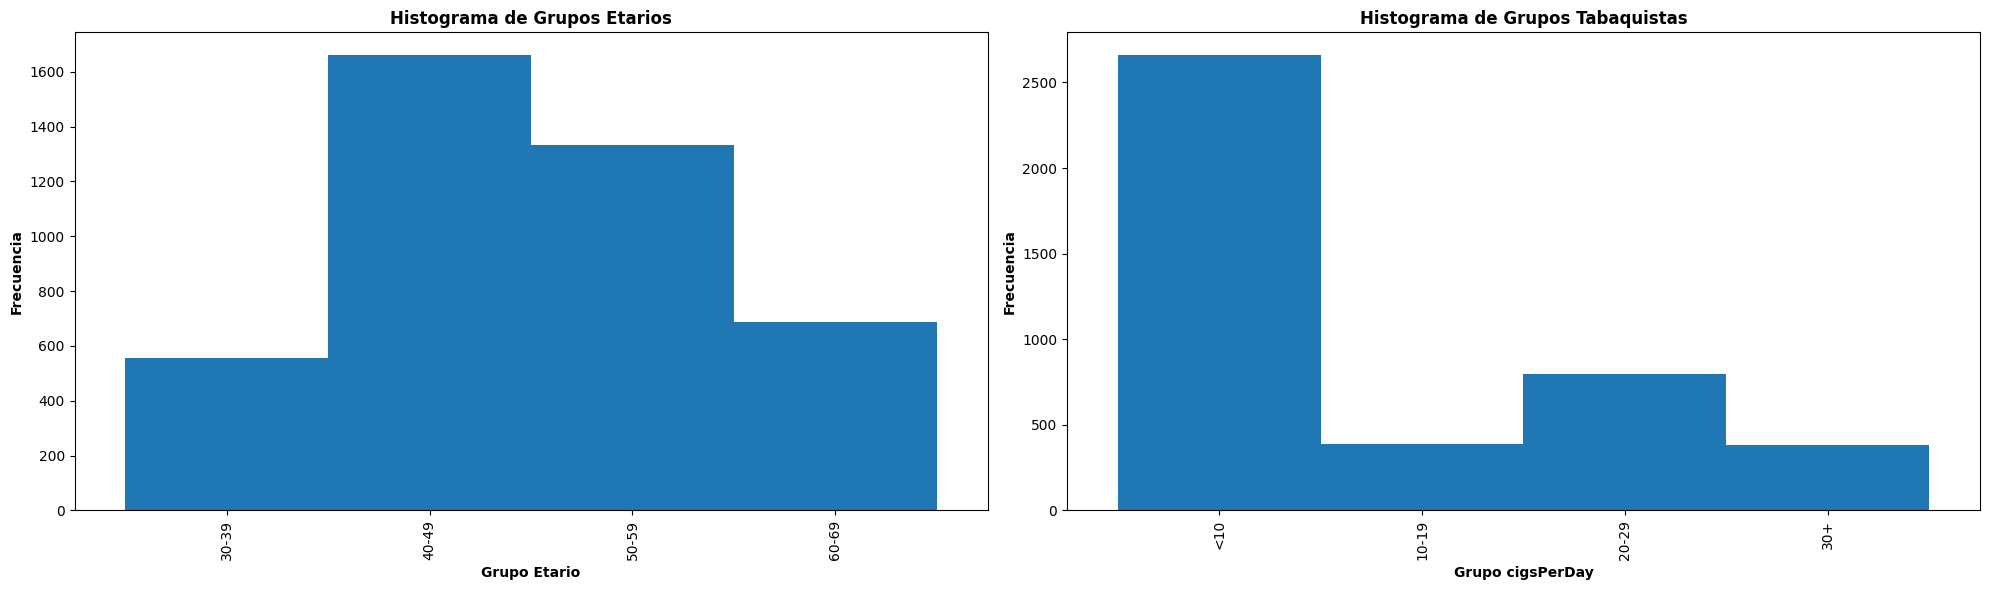

In [15]:
# Definir los rangos etarios y las etiquetas
age_bins = [30, 40, 50, 60, 70]
age_labels = ['30-39', '40-49', '50-59', '60-69']

# Crear una nueva columna para los grupos etarios
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Definir los rangos de cigarrillos diarios y las etiquetas
cigs_bins = [0, 10, 20, 30, 50]
cigs_labels = ['<10', '10-19', '20-29', '30+']

# Crear una nueva columna para los grupos de cigarrillos diarios
df['cigs_group'] = pd.cut(df['cigsPerDay'], bins=cigs_bins, labels=cigs_labels, right=False)

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Graficar el histograma para los grupos etarios
df['age_group'].value_counts(sort=False).plot(kind='bar', width=1, ax=axes[0]) #sort es false porque no queremos que ordene los valores por frecuencia, sino por los rangos etarios
axes[0].set_xlabel('Grupo Etario', fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontweight='bold')
axes[0].set_title('Histograma de Grupos Etarios', fontweight='bold')

# Graficar el histograma para los grupos de cigarrillos diarios
df['cigs_group'].value_counts(sort=False).plot(kind='bar', width=1, ax=axes[1])
axes[1].set_xlabel('Grupo cigsPerDay', fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontweight='bold')
axes[1].set_title('Histograma de Grupos Tabaquistas', fontweight='bold')

plt.tight_layout()
plt.show()

### **Hipertensión arterial**

La hipertensión arterial (HTA) es una condición en la que la presión de la sangre en las arterias es persistentemente alta. Esta presión elevada, al incrementar la postcarga y las resistencias vasculares, lleva al miocardio a tener que realizar mayor esfuerzo para vencerlas y poder eyectar la sangre, lo que puede llevar a una serie de complicaciones de salud.

#### **La HTA como Factor de Riesgo**
La hipertensión arterial es uno de los principales factores de riesgo para el desarrollo de enfermedades cardiovasculares. Puede causar daño a las arterias, lo que lleva a la aterosclerosis (endurecimiento y estrechamiento de las arterias), aumentando el riesgo de infarto de miocardio, insuficiencia cardíaca, accidente cerebrovascular y enfermedad renal. Además, la hipertensión puede provocar hipertrofia ventricular izquierda, una condición en la que el músculo del corazón se engrosa y se vuelve menos eficiente.

#### **Valores de Tensión Arterial**
Los valores de tensión arterial se clasifican de la siguiente manera:

**Tensión arterial normal:**

Sistólica (máxima): Menos de 120 mm Hg
Diastólica (mínima): Menos de 80 mm Hg

**Hipertensión:**

**Grado 1:**
Sistólica: 130-139 mm Hg
Diastólica: 80-89 mm Hg
**Grado 2:**
Sistólica: 140-179 mm Hg
Diastólica: 90-119 mm Hg

**Crisis hipertensiva:**

**Urgencia hipertensiva:**
Sistólica: 180 mm Hg o más
Diastólica: 120 mm Hg o más, sin daño agudo a órganos
**Emergencia hipertensiva:**
Sistólica: 180 mm Hg o más
Diastólica: 120 mm Hg o más, con daño agudo a órganos4.

In [16]:
# Definir la función de clasificación para sysBP
def class_sysBP(val):
    if val < 130:
        return 'Normal'
    else:
        return 'HTA'

# Crear una nueva columna para las clases basadas en los valores de sysBP
df['sysBP_class'] = df['sysBP'].apply(class_sysBP)

# Contar la cantidad de registros por clase
sysBP_df = df[['sysBP', 'sysBP_class']].groupby('sysBP_class').count()

# Ordenar los valores por 'normal' e 'HTA'
order = ['Normal', 'HTA']
sysBP_df = sysBP_df.reindex(order)

# Mostrar el DataFrame ordenado
sysBP_df

sysBP
sysBP_class       
Normal        2226
HTA           2014

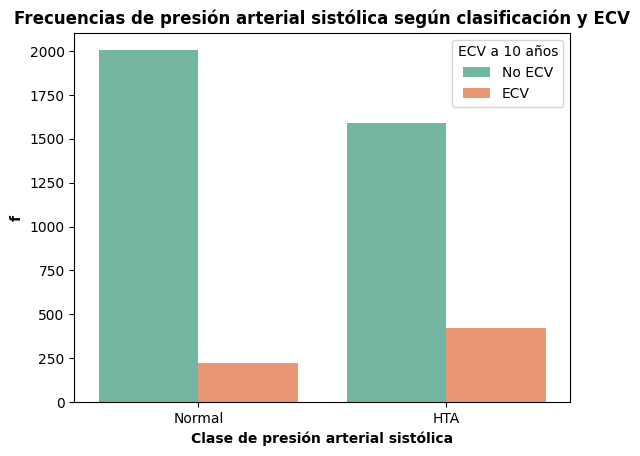

In [17]:
# Graficar el conteo de registros por clase, hue por TenYearCHD
sns.countplot(data=df, x='sysBP_class', hue='TenYearCHD', palette='Set2')

plt.xlabel('Clase de presión arterial sistólica', fontweight='bold')
plt.ylabel('f', fontweight='bold')
plt.title('Frecuencias de presión arterial sistólica según clasificación y ECV', fontweight='bold')
plt.legend(['No ECV', 'ECV'], title='ECV a 10 años', title_fontsize='10', loc='upper right')
plt.show()


### Insights:

Se observa que la brecha existente entre los que desarrollan ECV y los que no lo hacen se reduce significativamente conforme se progresa en la definición de HTA. Otro gráfico que evidencia a la HTA como un predictor de ECV a 10 años, y un factor de riesgo. 

In [18]:
countCHD = df['TenYearCHD'].value_counts()
countCHD

0    3596
1     644
Name: TenYearCHD, dtype: int64

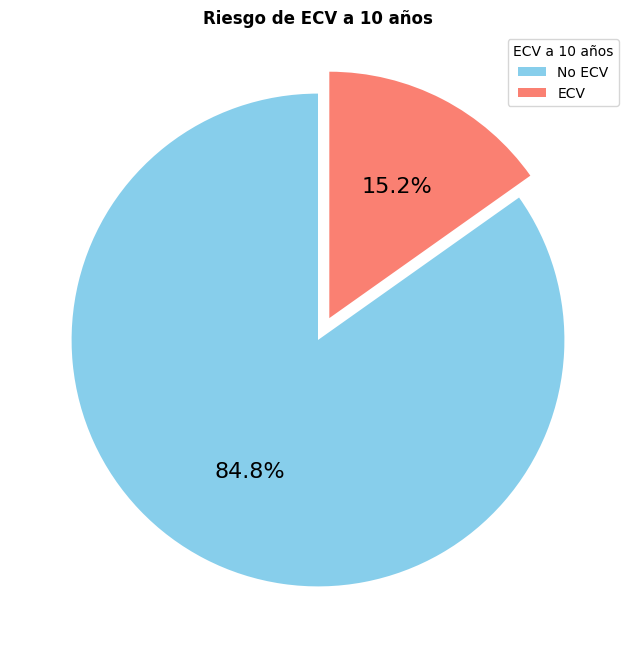

In [19]:
plt.figure(figsize=(10, 8))
plt.pie(countCHD, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode=(0, 0.1), textprops={'fontsize': 16})
plt.title('Riesgo de ECV a 10 años', fontweight='bold')
plt.legend(['No ECV', 'ECV'], title='ECV a 10 años', title_fontsize='10', loc='upper right')

plt.show()

Sobre el total de la muestra, el **15.2%** de los individuos **han desarrollado ECV** en el periodo de estudio (f=644)

### **MODELADO MACHINE LEARNING**

In [20]:
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD age_group cigs_group sysBP_class  
0           0     30-39        <10      Normal  
1           0     40-49        <10      Normal  
2           0     40-49      20-29      Normal  
3           1     60-69        30+         HTA  
4           0     40-49      20-29         HTA

A continuación, dropearé los siguientes features:

**education:** no es un feature que médicamente guarde relación significativa con la prevalencia de ECV.

**age_group:** ya cuento con el feature age, no favorecerá al modelo tener otro feature sobre lo mismo. 

**currentSmoker:** esto ya está parametrizado por el feature cigsPerDay.

**cigs_group:** esto ya está parametrizado por el feature cigsPerDay.

**sysBP_class:** ya cuento con el feature sysBP, no favorecerá al modelo tener otro feature sobre lo mismo. 

**diaBP:** presenta alta correlación con el feature sysBP (corr=0.77), con lo cual será favorable contar con un solo feature que refleje sa variabilidad de la tensión arterial de los pacientes de la muestra del estudio a los fines del modelado. 

In [21]:
df = df.drop(['education', 'age_group', 'currentSmoker', 'cigs_group', 'sysBP_class', 'diaBP'], axis=1)
df.head() # Presento el encabezado de los features y variable target del dataset para modelar

sex  age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0    1   39         0.0     0.0                0             0         0   
1    0   46         0.0     0.0                0             0         0   
2    1   48        20.0     0.0                0             0         0   
3    0   61        30.0     0.0                0             1         0   
4    0   46        23.0     0.0                0             0         0   

   totChol  sysBP    BMI  heartRate  glucose  TenYearCHD  
0    195.0  106.0  26.97       80.0     77.0           0  
1    250.0  121.0  28.73       95.0     76.0           0  
2    245.0  127.5  25.34       75.0     70.0           0  
3    225.0  150.0  28.58       65.0    103.0           1  
4    285.0  130.0  23.10       85.0     85.0           0

### Normalización de los datos

Dado que los datos están en diferentes escalas (categóricas, frecuencias, mmHg, mg/dL, latidos por minuto) realizo **normalización de los datos** con el parámetro StandardScaler. El objetivo es mejorar el rendimiento de los modelos predictivos y la comparabilidad. 

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalización de las variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### Validación simple

Divido el dataset en train y test, separando las variables independientes de la dependiente

In [23]:
from sklearn.model_selection import train_test_split

# División del dataset entre las variables independientes y la variable dependiente
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Entreno los modelos seleccionados

Utilizaré los modelos de Regresión logística, Árbol de decisión, Random Forest, SVM y KNN

In [24]:
# Importo las librerías de los modelos de clasificación

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Entrenamiento y predicción de los modelos

# Regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Regresión logística:\n", classification_report(y_test, y_pred_log_reg))

# Árbol de decisión
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Árbol de decisión:\n", classification_report(y_test, y_pred_tree))

# Random Forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión logística:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1077
           1       0.60      0.03      0.06       195

    accuracy                           0.85      1272
   macro avg       0.73      0.51      0.49      1272
weighted avg       0.81      0.85      0.79      1272

Árbol de decisión:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1077
           1       0.20      0.21      0.20       195

    accuracy                           0.76      1272
   macro avg       0.53      0.53      0.53      1272
weighted avg       0.76      0.76      0.76      1272

Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      1077
           1       0.42      0.06      0.10       195

    accuracy                           0.84      1272
   macro avg       0.64      0.52      0.51      1272
weighted avg    

Conforme a los resultados, se observa que si bien predice correctamente los valores negativos (0), no lo hace con los valores positivos (1), con lo cual no estaría prediciendo correctamente el riesgo de desarrollo de ECV. Esto se debe a que no está balanceada la muestra para ambos casos. 
Para corregirlo, incorporamos en los tres modelos el balanceo de la muestra:

In [25]:
# Muestro desbalance de la muestra
countCHD

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [26]:
# Regresión logística
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Regresión logística:\n", classification_report(y_test, y_pred_log_reg))

# Árbol de decisión
tree_des = DecisionTreeClassifier(class_weight='balanced')
tree_des.fit(X_train, y_train)
y_pred_tree = tree_des.predict(X_test)
print("Árbol de decisión:\n", classification_report(y_test, y_pred_tree))

# Random Forest
forest_clf = RandomForestClassifier(class_weight='balanced')
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

Regresión logística:
               precision    recall  f1-score   support

           0       0.90      0.65      0.75      1077
           1       0.23      0.58      0.33       195

    accuracy                           0.64      1272
   macro avg       0.56      0.62      0.54      1272
weighted avg       0.79      0.64      0.69      1272

Árbol de decisión:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1077
           1       0.24      0.25      0.25       195

    accuracy                           0.76      1272
   macro avg       0.55      0.55      0.55      1272
weighted avg       0.77      0.76      0.77      1272



C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1077
           1       0.58      0.04      0.07       195

    accuracy                           0.85      1272
   macro avg       0.72      0.52      0.49      1272
weighted avg       0.81      0.85      0.79      1272



El único cambio significativo observado es la mejora de la sensibilidad del modelo de regresión logística para los valores = 1, pero en detrimento de la precisión. A pesar de utilizar el parametro class_weight='balanced', no se logra optimizar los modelos utilizados. Se procede a utilizar SMOTE, de la librería imblearn, una técnica de sobremuestreo utilizada para abordar el problema del desbalanceo de clases en conjuntos de datos. Esta estrategia me permitiría mejorar el rendimiento de los modelos, evitar el sobreajuste, y equilibrar las clases 0 y 1. 

In [27]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vuelvo a entrenar y testear los modelos
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print('Regresión logística (SMOTE):\n', classification_report(y_test, y_pred))

tree_des = DecisionTreeClassifier(class_weight='balanced')
tree_des.fit(X_train_resampled, y_train_resampled)
y_pred_tree = tree_des.predict(X_test)
print("Árbol de decisión (SMOTE):\n", classification_report(y_test, y_pred_tree))

forest_clf = RandomForestClassifier(class_weight='balanced')
forest_clf.fit(X_train_resampled, y_train_resampled)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest (SMOTE):\n", classification_report(y_test, y_pred_forest))

C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión logística (SMOTE):
               precision    recall  f1-score   support

           0       0.88      0.61      0.72      1077
           1       0.20      0.55      0.30       195

    accuracy                           0.60      1272
   macro avg       0.54      0.58      0.51      1272
weighted avg       0.78      0.60      0.65      1272

Árbol de decisión (SMOTE):
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1077
           1       0.20      0.32      0.25       195

    accuracy                           0.70      1272
   macro avg       0.53      0.54      0.53      1272
weighted avg       0.76      0.70      0.72      1272

Random Forest (SMOTE):
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1077
           1       0.27      0.21      0.24       195

    accuracy                           0.79      1272
   macro avg       0.57      0.55      0.56   

C:\Users\matis\AppData\Local\Temp\ipykernel_24076\4073805057.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelos', y='Eficacia', data=accuracy_df, palette='viridis')


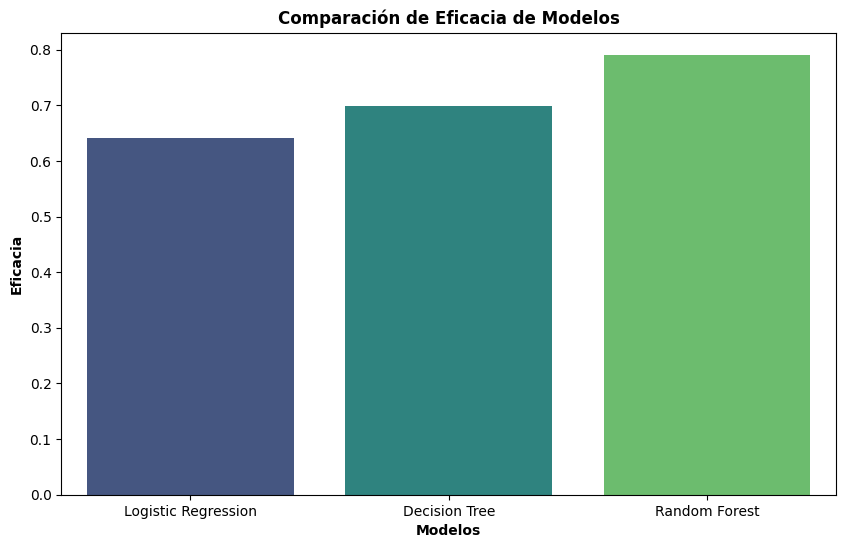

In [28]:
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
decision_tree_accuracy = accuracy_score(y_test, y_pred_tree)
random_forest_accuracy = accuracy_score(y_test, y_pred_forest)

# Crear un DataFrame con las precisiones de los modelos
accuracy_df = pd.DataFrame({
    'Modelos': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Eficacia': [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy]
})

# Graficar el barplot comparando las precisiones de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelos', y='Eficacia', data=accuracy_df, palette='viridis')
plt.xlabel('Modelos', fontweight='bold')
plt.ylabel('Eficacia', fontweight='bold')
plt.title('Comparación de Eficacia de Modelos', fontweight='bold')
plt.show()

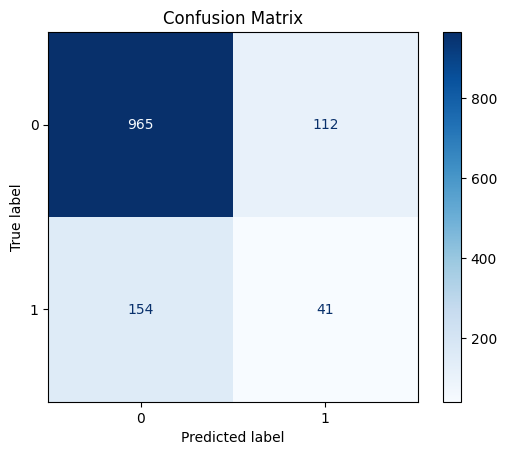

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_forest)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Importancia de las variables en el modelo Random Forest
importances = forest_clf.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importancia': importances})
feature_importances = feature_importances.sort_values(by='Importancia', ascending=False).round(2)
print(feature_importances)

            Feature  Importancia
8             sysBP         0.17
1               age         0.15
7           totChol         0.14
11          glucose         0.13
10        heartRate         0.13
9               BMI         0.12
2        cigsPerDay         0.09
3            BPMeds         0.03
0               sex         0.02
5      prevalentHyp         0.02
6          diabetes         0.00
4   prevalentStroke         0.00


### Insight:

La tensión arterial sistólica, la edad, la glucemia y el colesterol total se muestran como features (y factores de riesgo cardiovascular) predictivos de ECV, conforme a la importancia. 

In [31]:
# Inicializar modelos
svm = SVC(class_weight='balanced', probability=True)
knn = KNeighborsClassifier()

# Entrenar y evaluar SVM
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Entrenar y evaluar KNN
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)


C:\Users\matis\AppData\Local\Temp\ipykernel_24076\366191132.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model',


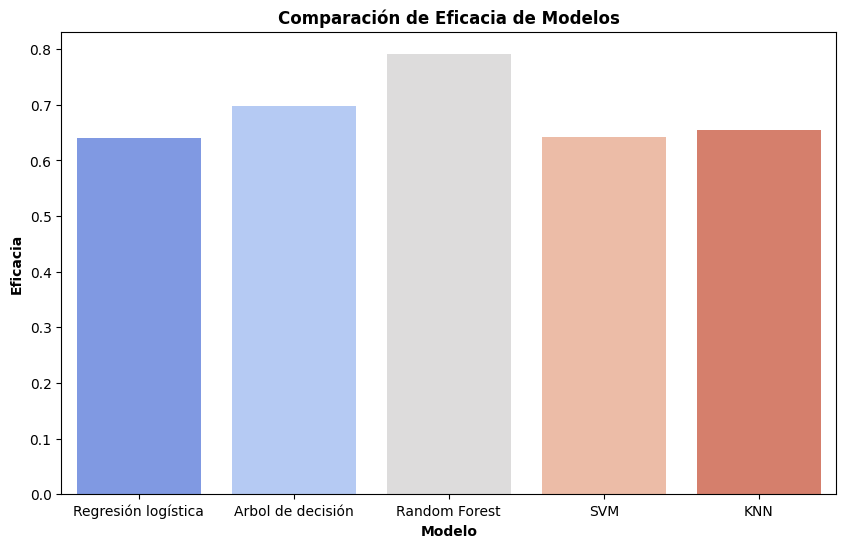

In [32]:
# Crear un DataFrame con las precisiones de los modelos
accuracy_df = pd.DataFrame({
    'Model': ['Regresión logística', 'Arbol de decisión', 'Random Forest','SVM', 'KNN'],
    'Accuracy': [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy, svm_accuracy, knn_accuracy]
})

# Graficar el barplot comparando las precisiones de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', 
            y='Accuracy',
            palette='coolwarm',
            data=accuracy_df)
plt.xlabel('Modelo', fontweight='bold')
plt.ylabel('Eficacia', fontweight='bold')
plt.title('Comparación de Eficacia de Modelos', fontweight='bold')

plt.show()

In [33]:
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
accuracy_df

Model  Accuracy
2        Random Forest  0.790881
1    Arbol de decisión  0.698113
4                  KNN  0.654088
3                  SVM  0.641509
0  Regresión logística  0.640723

In [34]:
# Regresión logística
print("Regresión logística:\n", classification_report(y_test, y_pred_log_reg))

# Árbol de decisión
print("Arbol de decisión:\n", classification_report(y_test, y_pred_tree))

# Random Forest
print("Random Forest:\n", classification_report(y_test, y_pred_forest))


Regresión logística:
               precision    recall  f1-score   support

           0       0.90      0.65      0.75      1077
           1       0.23      0.58      0.33       195

    accuracy                           0.64      1272
   macro avg       0.56      0.62      0.54      1272
weighted avg       0.79      0.64      0.69      1272

Arbol de decisión:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1077
           1       0.20      0.32      0.25       195

    accuracy                           0.70      1272
   macro avg       0.53      0.54      0.53      1272
weighted avg       0.76      0.70      0.72      1272

Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1077
           1       0.27      0.21      0.24       195

    accuracy                           0.79      1272
   macro avg       0.57      0.55      0.56      1272
weighted avg    

In [35]:
# SVM
print("SVM:\n", classification_report(y_test, y_pred_svm))

# KNN
print("KNN:\n", classification_report(y_test, y_pred_knn))

SVM:
               precision    recall  f1-score   support

           0       0.90      0.65      0.76      1077
           1       0.23      0.58      0.33       195

    accuracy                           0.64      1272
   macro avg       0.56      0.62      0.54      1272
weighted avg       0.79      0.64      0.69      1272

KNN:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      1077
           1       0.21      0.47      0.29       195

    accuracy                           0.65      1272
   macro avg       0.55      0.58      0.53      1272
weighted avg       0.78      0.65      0.70      1272



No se obtuvieron diferencias significativas con SMOTE. Utilizaremos otra tecnica de sobremuestreo de la libreria imblearn llamada ADASYN. A diferencia de SMOTE, ADASYN adapta la generación de muestras sintéticas en función de la densidad de las muestras minoritarias, generando más muestras en áreas donde la densidad es baja y menos donde es alta.

In [36]:
from imblearn.over_sampling import ADASYN

# Aplicar ADASYN al conjunto de entrenamiento
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [37]:
# Entrenar el modelo
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predecir y evaluar
y_pred = model.predict(X_test)
print('Regresión logística:\n', classification_report(y_test, y_pred))

# Árbol de decisión
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_resampled, y_train_resampled)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

# Random Forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_resampled, y_train_resampled)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

Regresión logística:
               precision    recall  f1-score   support

           0       0.88      0.63      0.74      1077
           1       0.20      0.52      0.29       195

    accuracy                           0.61      1272
   macro avg       0.54      0.58      0.51      1272
weighted avg       0.78      0.61      0.67      1272

Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      1077
           1       0.20      0.35      0.26       195

    accuracy                           0.69      1272
   macro avg       0.53      0.55      0.53      1272
weighted avg       0.76      0.69      0.72      1272



C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1077
           1       0.22      0.21      0.21       195

    accuracy                           0.77      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.76      0.77      0.77      1272



In [38]:
# Inicializar modelos
svm = SVC()
knn = KNeighborsClassifier()

# Entrenar y evaluar SVM
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Entrenar y evaluar KNN
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [39]:
# SVM
print("SVM:\n", classification_report(y_test, y_pred_svm))

# KNN
print("KNN:\n", classification_report(y_test, y_pred_knn))

SVM:
               precision    recall  f1-score   support

           0       0.91      0.60      0.72      1077
           1       0.23      0.66      0.34       195

    accuracy                           0.61      1272
   macro avg       0.57      0.63      0.53      1272
weighted avg       0.80      0.61      0.67      1272

KNN:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76      1077
           1       0.22      0.52      0.31       195

    accuracy                           0.64      1272
   macro avg       0.55      0.59      0.53      1272
weighted avg       0.78      0.64      0.69      1272



### Preparacion de las variables para graficar los resultados de los modelos

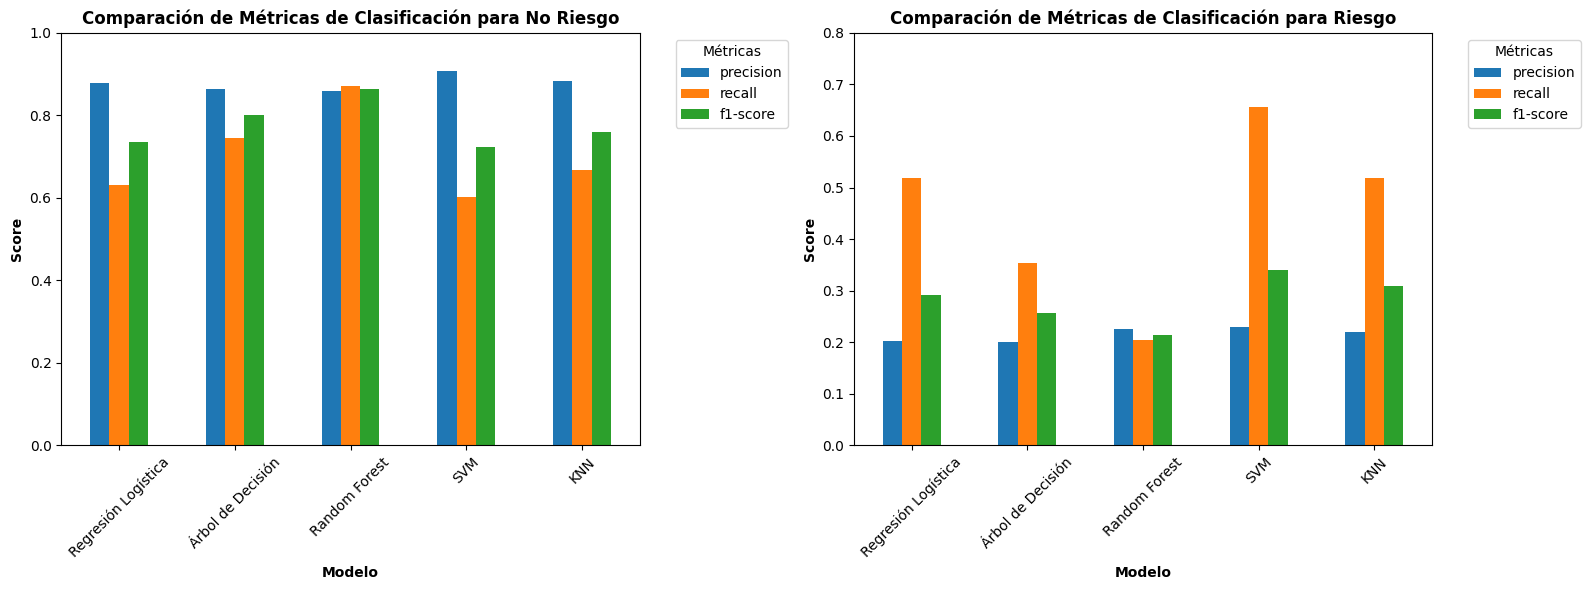

In [40]:
# Generar los reportes de clasificación
report_RL = classification_report(y_test, y_pred, output_dict=True)
report_arbol = classification_report(y_test, y_pred_tree, output_dict=True)
report_forest = classification_report(y_test, y_pred_forest, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Convertir los reportes a DataFrames
df_report_RL = pd.DataFrame(report_RL).transpose()
df_report_arbol = pd.DataFrame(report_arbol).transpose()
df_report_forest = pd.DataFrame(report_forest).transpose()
df_report_svm = pd.DataFrame(report_svm).transpose()
df_report_knn = pd.DataFrame(report_knn).transpose()

# Filtrar solo las clases 0 y 1 y renombrar
df_filtered_RL = df_report_RL.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})
df_filtered_arbol = df_report_arbol.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})
df_filtered_forest = df_report_forest.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})
df_filtered_svm = df_report_svm.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})
df_filtered_knn = df_report_knn.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})

# Añadir una columna para identificar el modelo
df_filtered_RL['Modelo'] = 'Regresión Logística'
df_filtered_arbol['Modelo'] = 'Árbol de Decisión'
df_filtered_forest['Modelo'] = 'Random Forest'
df_filtered_svm['Modelo'] = 'SVM'
df_filtered_knn['Modelo'] = 'KNN'

# Combinar todos los DataFrames
df_combined = pd.concat([df_filtered_RL, df_filtered_arbol, df_filtered_forest, df_filtered_svm, df_filtered_knn])

# Resetear el índice para facilitar el gráfico
df_combined.reset_index(inplace=True)

# Crear una columna combinada para el índice
df_combined['Clase_Modelo'] = df_combined['index'] + ' (' + df_combined['Modelo'] + ')'

# Filtrar los datos para "No Riesgo" y "Riesgo"
df_no_riesgo = df_combined[df_combined['index'] == 'No riesgo']
df_riesgo = df_combined[df_combined['index'] == 'Riesgo']

# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico para "No Riesgo"
df_no_riesgo.set_index('Clase_Modelo')[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Comparación de Métricas de Clasificación para No Riesgo', fontweight='bold')
axes[0].set_xlabel('Modelo', fontweight='bold')
axes[0].set_xticklabels(df_no_riesgo['Modelo'], rotation=45)
axes[0].set_ylabel('Score', fontweight='bold')
axes[0].legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_ylim(0, 1)

# Gráfico para "Riesgo"
df_riesgo.set_index('Clase_Modelo')[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Comparación de Métricas de Clasificación para Riesgo', fontweight='bold')
axes[1].set_xlabel('Modelo', fontweight='bold')
axes[1].set_xticklabels(df_riesgo['Modelo'], rotation=45)
axes[1].set_ylabel('Score', fontweight='bold')
axes[1].legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_ylim(0, 0.8)

# Ajustar el layout
plt.tight_layout()
plt.show()

### Insights:

- Todos los modelos entrenados y balanceados muestran una precisión similar cercana al 0.9 para la clase No Riesgo de TenYearCHD
- Random Forest y Arbol de Decisión muestran el mejor f1-score para la clase No Riesgo de TenYearCHD. Considerando el desbalance de la muestra y que las estrategias utilizadas no han mejorado significativamente la precisión, analizar la recall y f1-score será importante para determinar el mejor modelo. 
- Todos los modelos entrenados y balanceados muestran una precisión similar cercana al 0.2 para la clase Riesgo de TenYearCHD
- SVM muestra el mejor f1-score a partir de una alta sensibilidad par la clase Riesgo de TenYearCHD
- Random Forest muestra valores muy similares entre precisión, recall y f1-score


In [41]:
# Crear un DataFrame con los reportes de clasificación de todos los modelos utilizados y mejorados

df_combined1 = pd.concat([df_report_RL, df_report_arbol, df_report_forest, df_report_svm, df_report_knn], keys=['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'SVM', 'KNN'])
df_combined1.drop(columns=['support'], inplace=True)   # Eliminar la columna 'support'
print('Rendimiento de modelos:\n', df_combined1)


Rendimiento de modelos:
                                   precision    recall  f1-score
Regresión Logística 0              0.878710  0.632312  0.735421
                    1              0.203219  0.517949  0.291908
                    accuracy       0.614780  0.614780  0.614780
                    macro avg      0.540964  0.575130  0.513664
                    weighted avg   0.775156  0.614780  0.667430
Árbol de Decisión   0              0.864370  0.745590  0.800598
                    1              0.201166  0.353846  0.256506
                    accuracy       0.685535  0.685535  0.685535
                    macro avg      0.532768  0.549718  0.528552
                    weighted avg   0.762700  0.685535  0.717188
Random Forest       0              0.858318  0.871866  0.865039
                    1              0.224719  0.205128  0.214477
                    accuracy       0.769654  0.769654  0.769654
                    macro avg      0.541519  0.538497  0.539758
               

### Gráficos comparativos de rendimiento de los modelos entrenados

Realizaré gráficos de barras comparando las métricas de rendimiento de los modelos entrenados para su posterior análisis.

C:\Users\matis\AppData\Local\Temp\ipykernel_24076\3460868701.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model',


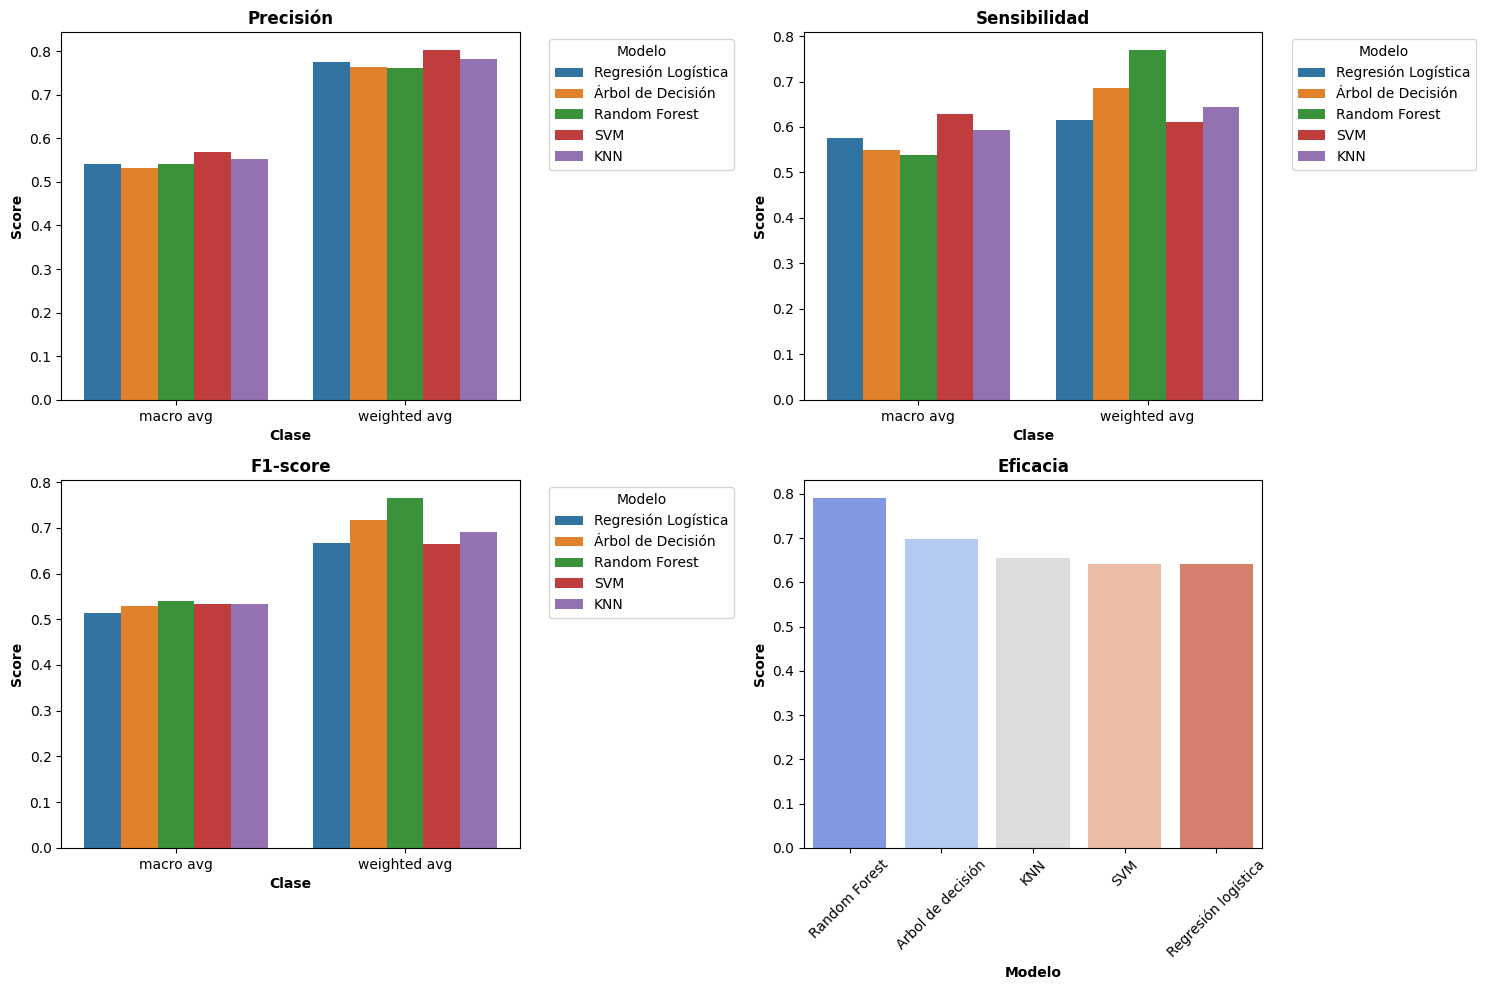

In [42]:
# Filtrar solo las clases 0 y 1 y renombrar
df_filtered_RL = df_report_RL.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]
df_filtered_arbol = df_report_arbol.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]
df_filtered_forest = df_report_forest.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]
df_filtered_svm = df_report_svm.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]
df_filtered_knn = df_report_knn.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]

# Añadir una columna para identificar el modelo
df_filtered_RL['Modelo'] = 'Regresión Logística'
df_filtered_arbol['Modelo'] = 'Árbol de Decisión'
df_filtered_forest['Modelo'] = 'Random Forest'
df_filtered_svm['Modelo'] = 'SVM'
df_filtered_knn['Modelo'] = 'KNN'

# Combinar todos los DataFrames
df_combined = pd.concat([df_filtered_RL, df_filtered_arbol, df_filtered_forest, df_filtered_svm, df_filtered_knn])

# Resetear el índice para facilitar el gráfico
df_combined.reset_index(inplace=True)

# Crear subplots
plt.figure(figsize=(15, 10))

# Gráfico de barras para la precisión
plt.subplot(2, 2, 1)
sns.barplot(x='index', y='precision', hue='Modelo', data=df_combined)
plt.title('Precisión', fontweight='bold')
plt.xlabel('Clase', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico de barras para la sensibilidad
plt.subplot(2, 2, 2)
sns.barplot(x='index', y='recall', hue='Modelo', data=df_combined)
plt.title('Sensibilidad', fontweight='bold')
plt.xlabel('Clase', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico de barras para el F1-score
plt.subplot(2, 2, 3)
sns.barplot(x='index', y='f1-score', hue='Modelo', data=df_combined)
plt.title('F1-score', fontweight='bold')
plt.xlabel('Clase', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Graficar el barplot comparando las precisiones de los modelos
plt.subplot(2, 2, 4)
sns.barplot(x='Model', 
            y='Accuracy',
            palette='coolwarm',
            data=accuracy_df)
plt.xlabel('Modelo', fontweight='bold')
plt.xticks(rotation=45) 
plt.ylabel('Score', fontweight='bold')
plt.title('Eficacia', fontweight='bold')

# Ajustar el layout
plt.tight_layout()
plt.show()

### Insights>

- Si bien los modelos predicen muy bien la clase 0, el desbalance de la muestra hace que la clase 1 no sea tan bien predicha en terminos relativos, a pesar de haber utilizado dentro de los modelos el parámetro *class_weight='balanced'*, SMOTE y ADASYN (librería imblearn). 
- Para casos de desbalance de las clases, el promedio ponderado (weighted avg) es un buen indicador de rendimiento del modelo. Se observan scores de wighted avg por encima del 75% en la precision de todos los modelos. En cuanto a la sensibilidad, Random Forest logra el mejor promedio ponderado del 78.94%, al igual que el F1-score que promedia la precision y la sensibilidad con un 78.67%. Random Forest logra la mejor eficacia relativa con un 78.94%. 
- Random Forest mostraría el mejor rendimiento predictivo con relacion a los otros modelos utilizados. 

### Comparativa de matrices de confusión de los modelos entrenados

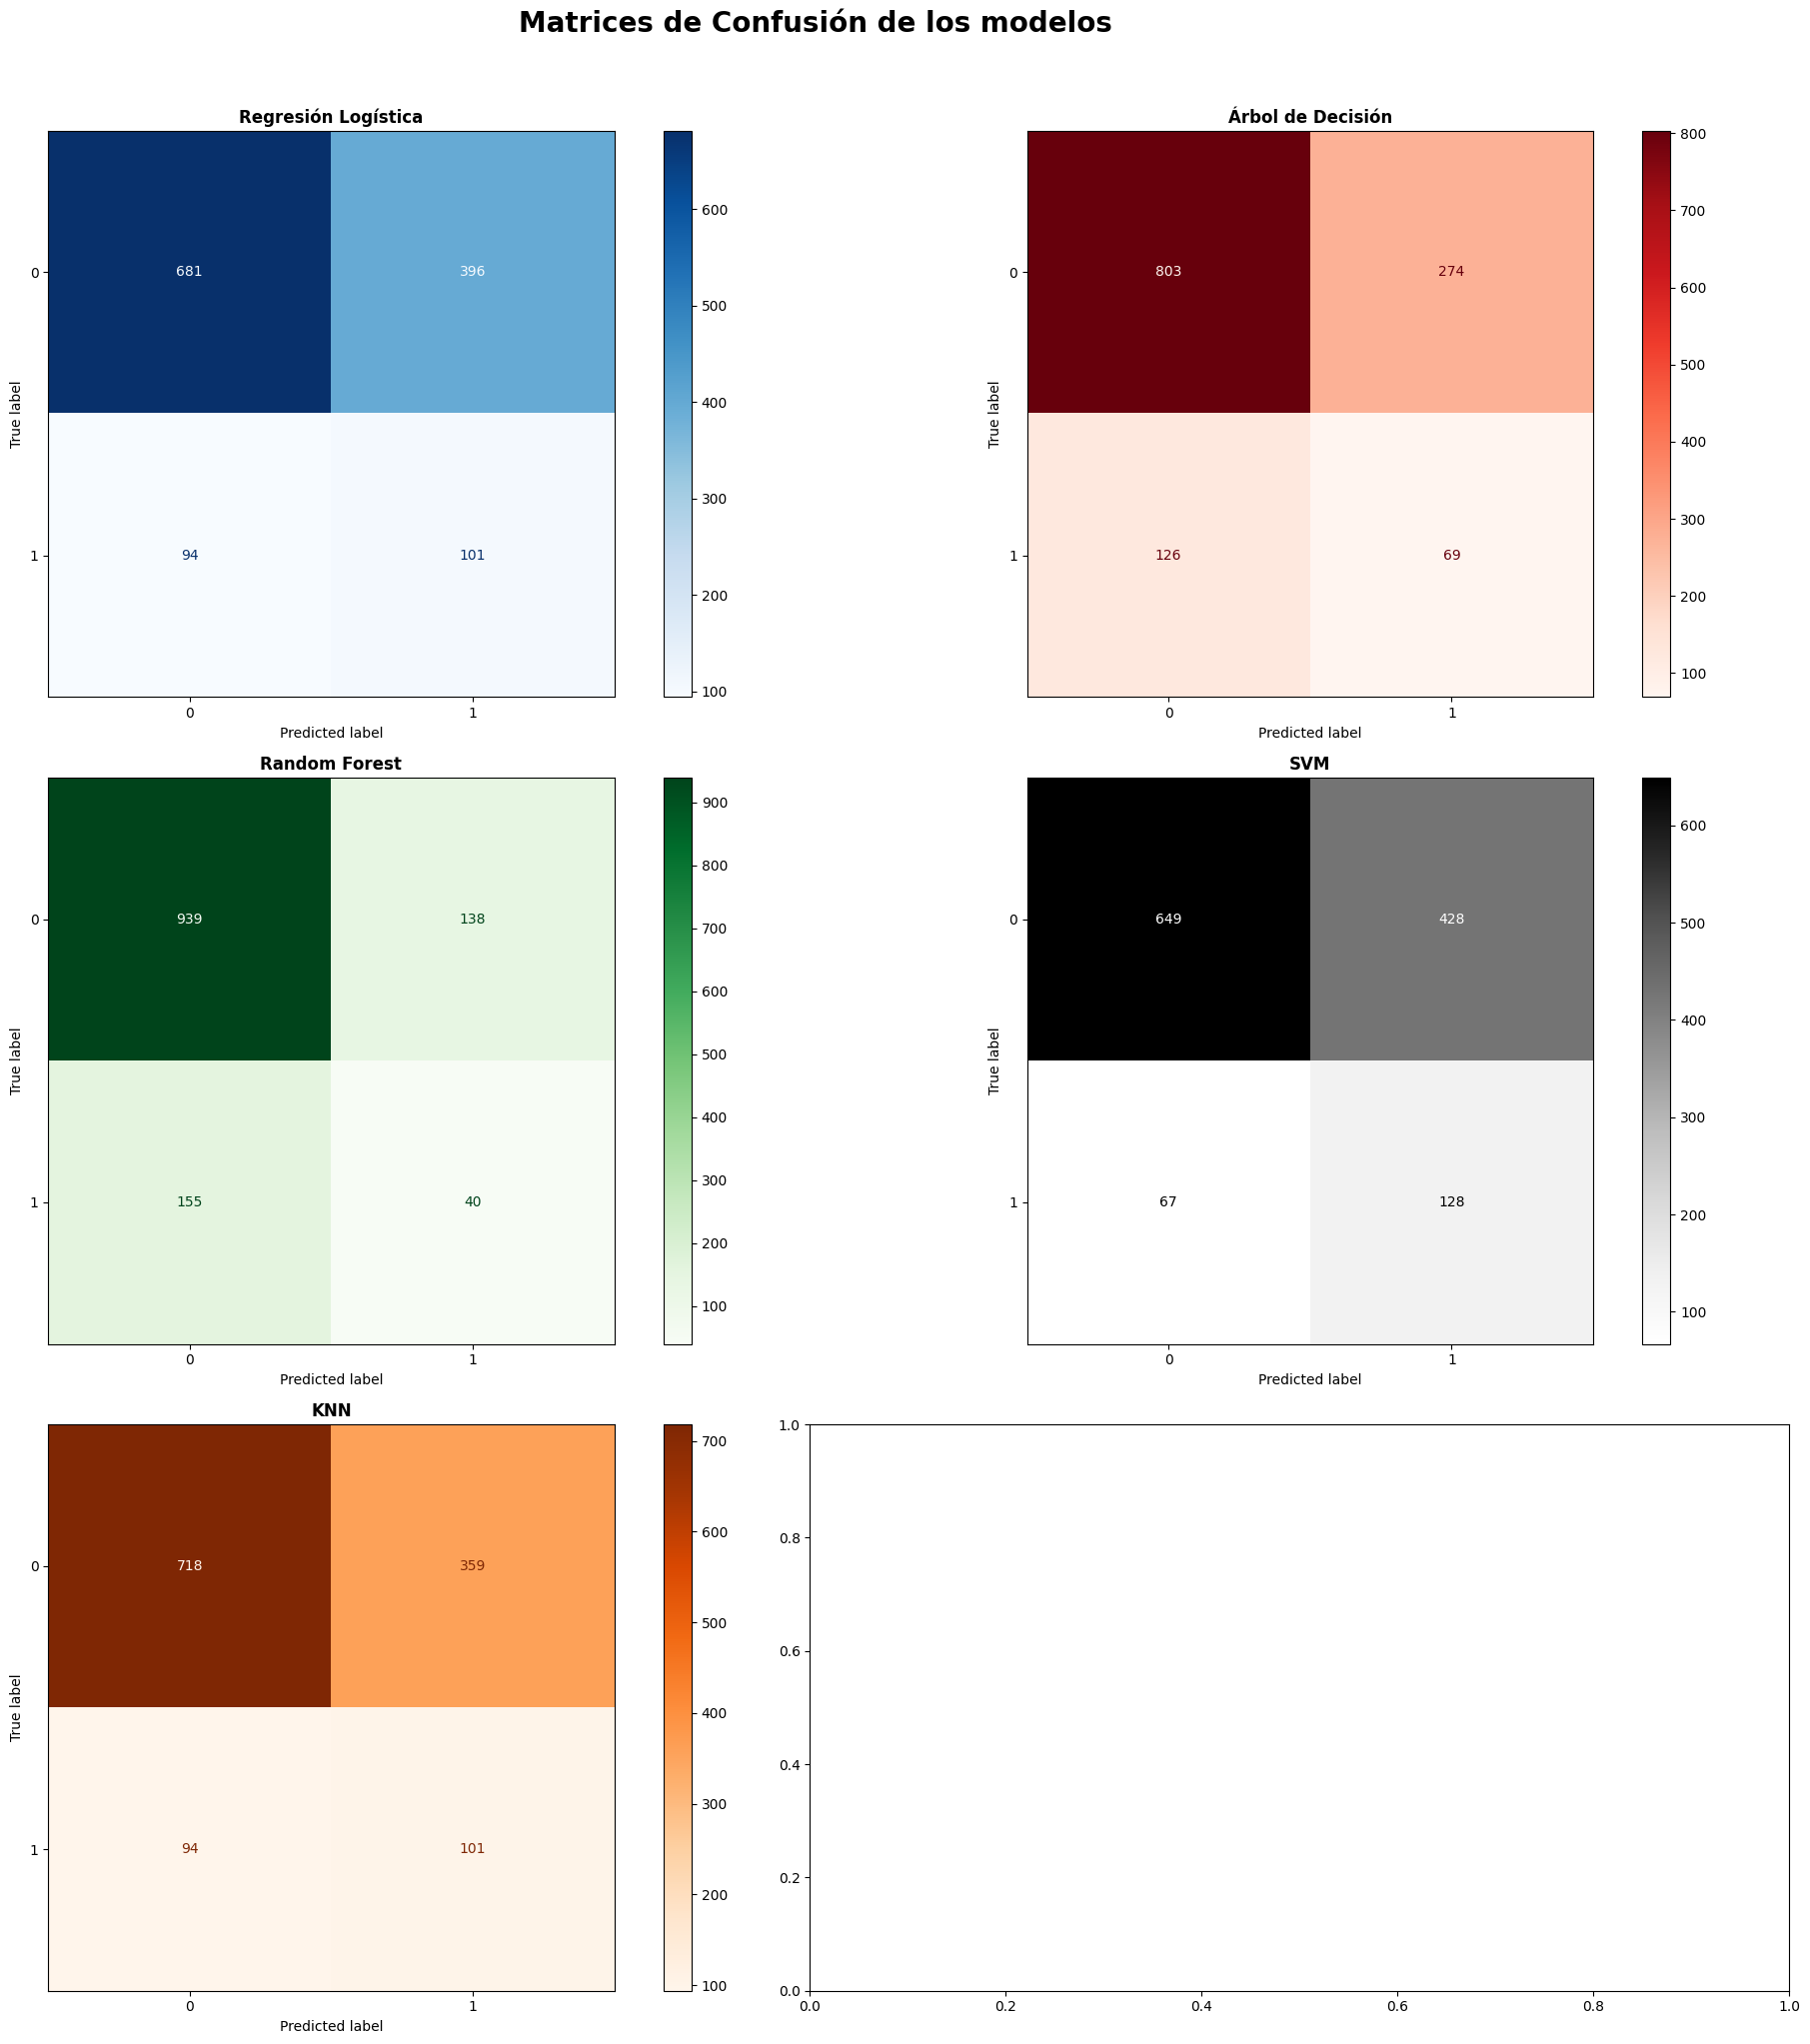

In [43]:
# Crear la matriz de confusión
cm_RL = confusion_matrix(y_test, y_pred)
cm_arbol = confusion_matrix(y_test, y_pred_tree)
cm_RF = confusion_matrix(y_test, y_pred_forest)
cm_SVM = confusion_matrix(y_test, y_pred_svm)
cm_KNN = confusion_matrix(y_test, y_pred_knn)

# Mostrar las matrices de confusión
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Regresión logística
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RL)
disp.plot(cmap=plt.cm.Blues, ax=axes[0, 0])
axes[0, 0].set_title('Regresión Logística', fontweight='bold')

# Árbol de decisión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_arbol)
disp.plot(cmap=plt.cm.Reds, ax=axes[0, 1])
axes[0, 1].set_title('Árbol de Decisión', fontweight='bold')

# Random Forest
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp.plot(cmap=plt.cm.Greens, ax=axes[1, 0])
axes[1, 0].set_title('Random Forest', fontweight='bold')

# SVM
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
disp.plot(cmap=plt.cm.Greys, ax=axes[1, 1])
axes[1, 1].set_title('SVM', fontweight='bold')

# KNN
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN)
disp.plot(cmap=plt.cm.Oranges, ax=axes[2, 0])
axes[2, 0].set_title('KNN', fontweight='bold')

plt.suptitle('Matrices de Confusión de los modelos', fontsize=20, fontweight='bold', y=1.02)

# Ajustar el layout
plt.tight_layout()
plt.show()

### Insights:

Las matrices de confusion aportan una informacion interesante desde lo estrictamente medico. El objetivo de estos modelos es predecir el desarrollo de ECV, con el objetivo de tomar medidas terapeuticas e higienico - dieteticas con los pacientes con perfil de riesgo. En este sentido, lo eticamente peligroso seria que el modelo prediga que no tienen riesgo los pacientes que en realidad si lo tienen. Por eso estas matrices de confusion aportan un muy buen dato, mas alla de los scores de eficacia, rendimiento y sensibilidad presentados anteriormente. Por ejemplo, si bien Random Forest mostro el mejor rendimiento en terminos generales y relativos, se observa que da 149 falsos negativos, y solo 27 verdaderos positivos. Es decir, que de 1098 unidades de analisis (que es el 30% de la muestra total que se utilizo para testear los modelos), a 149 pacientes con riesgo de ECV el modelo les dira que no tienen riesgo, y solo a 27 que si lo tienen. Esto significaría que a un 14% que requeriría de tratamiento preventivo no lo recibirá, y que a un 2% que no requiere tratamiento sí se le dará. SVM en cambio solo 44 pacientes con riesgo recibiran un falso negativo, mientras que 132 recibiran un screening de riesgo de ECV acertado, pero 351 pacientes recibiran un falso positivo, otorgando tratamiento a un 30% de pacientes que no lo requeririan e incrementando asi el costo en salud de manera ineficiente. Algo similar a SVM ocurre con el modelo de Regresion Logistica. 

Como conclusion, es importante poder seguir testeando el dataset, ajustar hiperparametros, revisar los subdatasets de entrenamiento y prueba y revisar las estrategias de sobremuestreo para tratar el desbalanceo de las clases. Random Forest presenta los mejores scores de rendimiento general y relativo. Las matrices de confusion son un buen recurso de informacion para revisar aspectos medicos eticos de las predicciones. 

Dado que seleccionaré Random Forest, no trataré outliers del dataframe. 

### **HYPERTUNING** (Ajuste de hiperparámetros)

En virtud del análisis del anterior, seleccioné Random Forest como modelo con los mejores resultados posibles para el dataset, el cual sin embargo requiere ajuste de sus hiperparámetros para optimizar el rendimiento y precisión de sus predicciones. Seleccioné Bayes Grid Search porque si bien duplica las combinaciones, permite utilizar todos los núcleos del procesador (yo cuento con un Intel I9 14900 KF de 24 núcleos), lo que junto a sus demás prestaciones (combinaciones duplicada + inversas, evaluaciones previas para testear nuevos candidatos con mejores resultados, capacidad de detectar desvíos, autoajuste) me parece un balance favorable entre requerimiento computacional y resultados de hypertuning. 

In [44]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real

# Definir el espacio de búsqueda para los hiperparámetros
param_space = {
    'n_estimators': Integer(100, 2000),  # Número de árboles (entre 100 y 2000)
    'max_depth': Integer(3, 50),         # Profundidad máxima del árbol (entre 3 y 50)
    'max_features': Categorical(['sqrt', 'log2']),  # Número de características a considerar
    'min_samples_split': Integer(2, 20),  # Mínimo de muestras para dividir un nodo (entre 2 y 20)
    'min_samples_leaf': Integer(1, 20),   # Mínimo de muestras en una hoja (entre 1 y 20)
    'bootstrap': Categorical([True, False])  # Usar bootstrap o no
}

# Inicializar el modelo
rf = RandomForestClassifier(random_state=42)

# Configurar BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=30,  # Número de iteraciones (combinaciones a probar)
    cv=5,       # Número de folds en la validación cruzada
    n_jobs=-1,  # Usar todos los núcleos del CPU
    random_state=42,
    verbose=1   # Mostrar progreso
)

# Ajustar el modelo
bayes_search.fit(X_train_resampled, y_train_resampled)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(bayes_search.best_params_)

# Evaluar el modelo en el conjunto de prueba
accuracy = bayes_search.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

A continuación, ajustaré los hiperparámetros según los mejores resultados obtenidos. Luego realizaré validación cruzada estratificada (dado que mi muestra está desbalanceada) para comparar su precisión con la de prueba. Para evitar diferencias de precisión que pudiera indicar sobreajuste, dado que utilicé técnicas de balanceo en el data wrangling, insertaré SMOTE (que fue una de las que utilicé anteriormente) dentro de la configuración de los hiperparámetros.

In [45]:
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Configuro los mejores hiperparámetros encontrados, sumando SMOTE
best_rf = make_pipeline(
    SMOTE(random_state=42),
    RandomForestClassifier(
        bootstrap=False,
        max_depth=29,
        max_features='log2',
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=1869,
        random_state=42
    )
)

# Validación cruzada estratificada
cv_scores = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42), scoring='accuracy')
print(f"Precisión en validación cruzada estratificada: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

Precisión en validación cruzada estratificada: 0.8825 (± 0.0154)


### Análisis de la precisión en el conjunto de prueba vs validación cruzada:

Los resultados muestran una diferencia del 9% de precisión entre el conjunto de prueba y el de validación cruzada estratificada. Como comentarío, inicialmente se obtuvo diferencias mayores, por lo cual se estuvo optimizando el data wrangling, quitando features que podrían entorpecer el modelo, se modificó el dropeo de nulos por reemplazo por la media, inserté SMOTE y se retestearon los hiperparámetros. La diferencia presentada fue la mejor posible que obtuve. 

In [46]:
# Entrenar el modelo con los mejores hiperparámetros
best_rf.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Reporte de clasificación
print("Reporte de clasificación - Random Forest Mejorado:")
print(classification_report(y_test, y_pred))

Reporte de clasificación - Random Forest Mejorado:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1077
           1       0.23      0.16      0.19       195

    accuracy                           0.79      1272
   macro avg       0.54      0.53      0.54      1272
weighted avg       0.76      0.79      0.77      1272



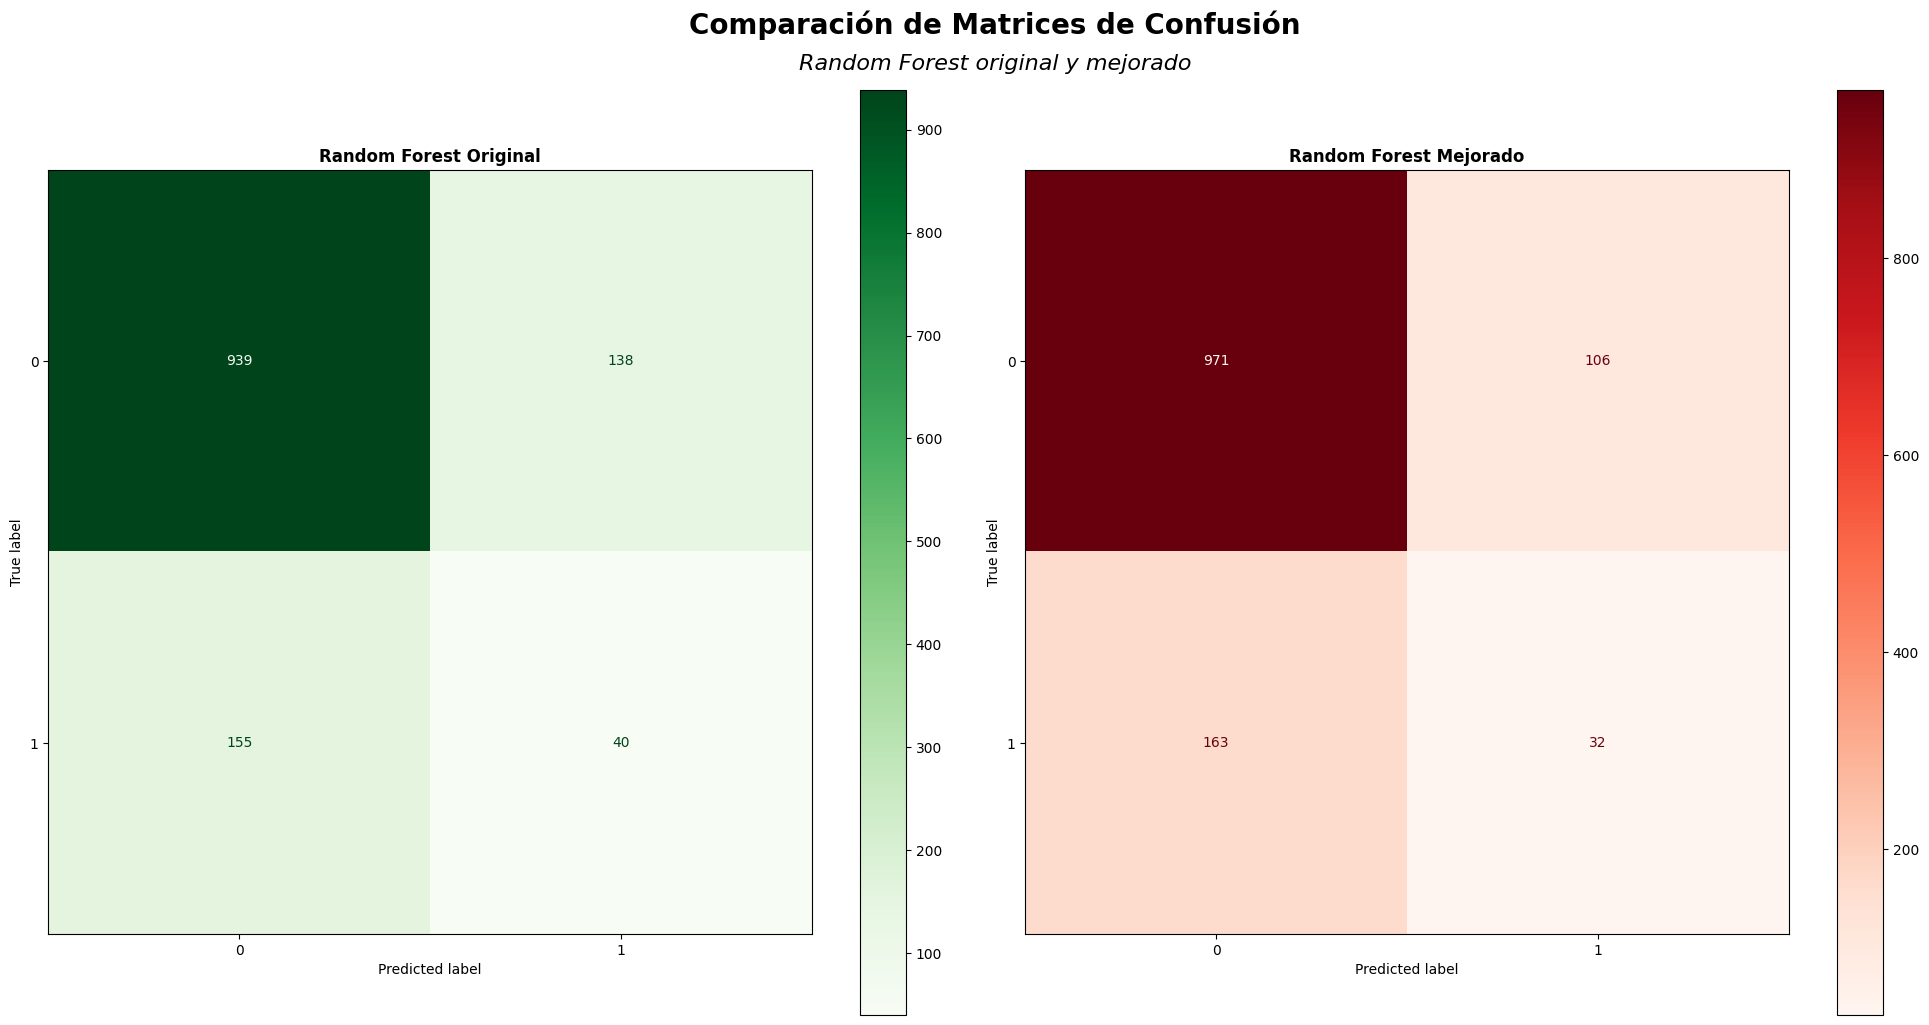

In [47]:
# Comparar matrices de confusión del modelo Random Forest original y el mejorado

# Crear la matriz de confusión
cm_RF2 = confusion_matrix(y_test, y_pred)

# Mostrar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Random Forest original

disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp.plot(cmap=plt.cm.Greens, ax=axes[0])
axes[0].set_title('Random Forest Original', fontweight='bold')

# Random Forest mejorado
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF2)
disp.plot(cmap=plt.cm.Reds, ax=axes[1])
axes[1].set_title('Random Forest Mejorado', fontweight='bold')

plt.suptitle('Comparación de Matrices de Confusión', fontsize=20, fontweight='bold', y=1.02)
plt.figtext(0.5, 0.96, 'Random Forest original y mejorado', ha='center', fontsize=16, style='italic')

# Ajustar el layout
plt.tight_layout()
plt.show()

### Insigths:

Random Forest Original:

VP + VN / TOTAL = 76,33%

Random Forest Mejorado:

VP + VN / TOTAL = 78.85%

Se observa una leve mejora del rendimiento (2.52%) respecto al RF original. 

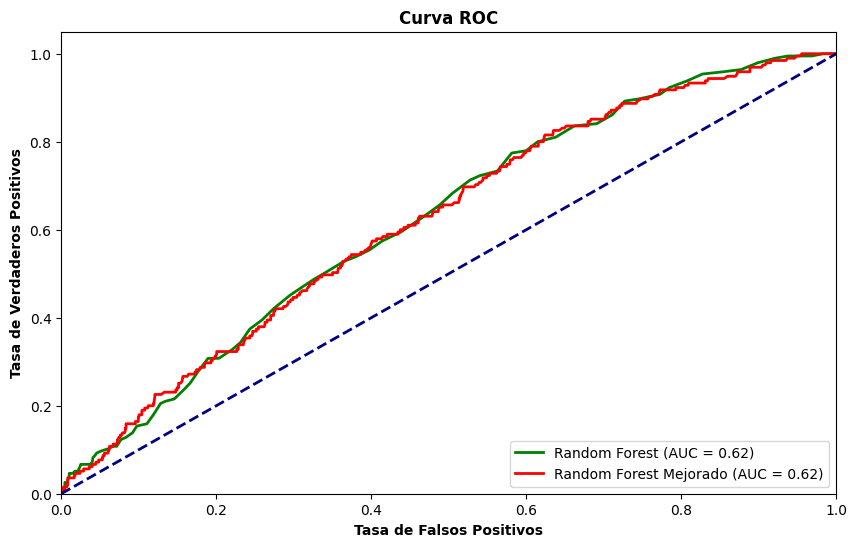

In [48]:
# Comparar la curva ROC del modelo Random Forest original y el mejorado

from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

# Calcular las probabilidades de predicción
y_prob_RF = forest_clf.predict_proba(X_test)[:, 1]
y_prob_RF2 = best_rf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_prob_RF)
fpr_RF2, tpr_RF2, _ = roc_curve(y_test, y_prob_RF2)

# Calcular el AUC
roc_auc_RF = roc_auc_score(y_test, y_prob_RF)
roc_auc_RF2 = roc_auc_score(y_test, y_prob_RF2)

# Mostrar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_RF, tpr_RF, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_RF:.2f})')

plt.plot(fpr_RF2, tpr_RF2, color='red', lw=2, label=f'Random Forest Mejorado (AUC = {roc_auc_RF2:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontweight='bold')
plt.ylabel('Tasa de Verdaderos Positivos', fontweight='bold')
plt.title('Curva ROC', fontweight='bold')
plt.legend(loc='lower right')

plt.show()

### Insights y consideraciones sobre Bagging y Boosting

- El ajuste de hiperparámetros no ha mejorado el AUC
- Dado que estoy utilizando Random Forest, no ejecuto métodos combinados de bagging o boosting. Bagging ya está incluido en Random Forest, Boosting es para modelos más débiles. 

In [49]:
# Ajustar el umbral de clasificación para reducir los falsos negativos

# Probabilidades de predicción
y_probs = best_rf.predict_proba(X_test)

# Crear una lista vacía para almacenar las predicciones ajustadas
y_pred_adjusted = []

# Ajustar el umbral de clasificación
for prob in y_probs:
    if prob[1] > 0.3:
        y_pred_adjusted.append(1)
    else:
        y_pred_adjusted.append(0)

# Reporte de clasificación

print("Reporte de clasificación - Random Forest Mejorado (Umbral ajustado):")
print(classification_report(y_test, y_pred_adjusted))


Reporte de clasificación - Random Forest Mejorado (Umbral ajustado):
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1077
           1       0.21      0.50      0.29       195

    accuracy                           0.63      1272
   macro avg       0.54      0.57      0.52      1272
weighted avg       0.77      0.63      0.68      1272



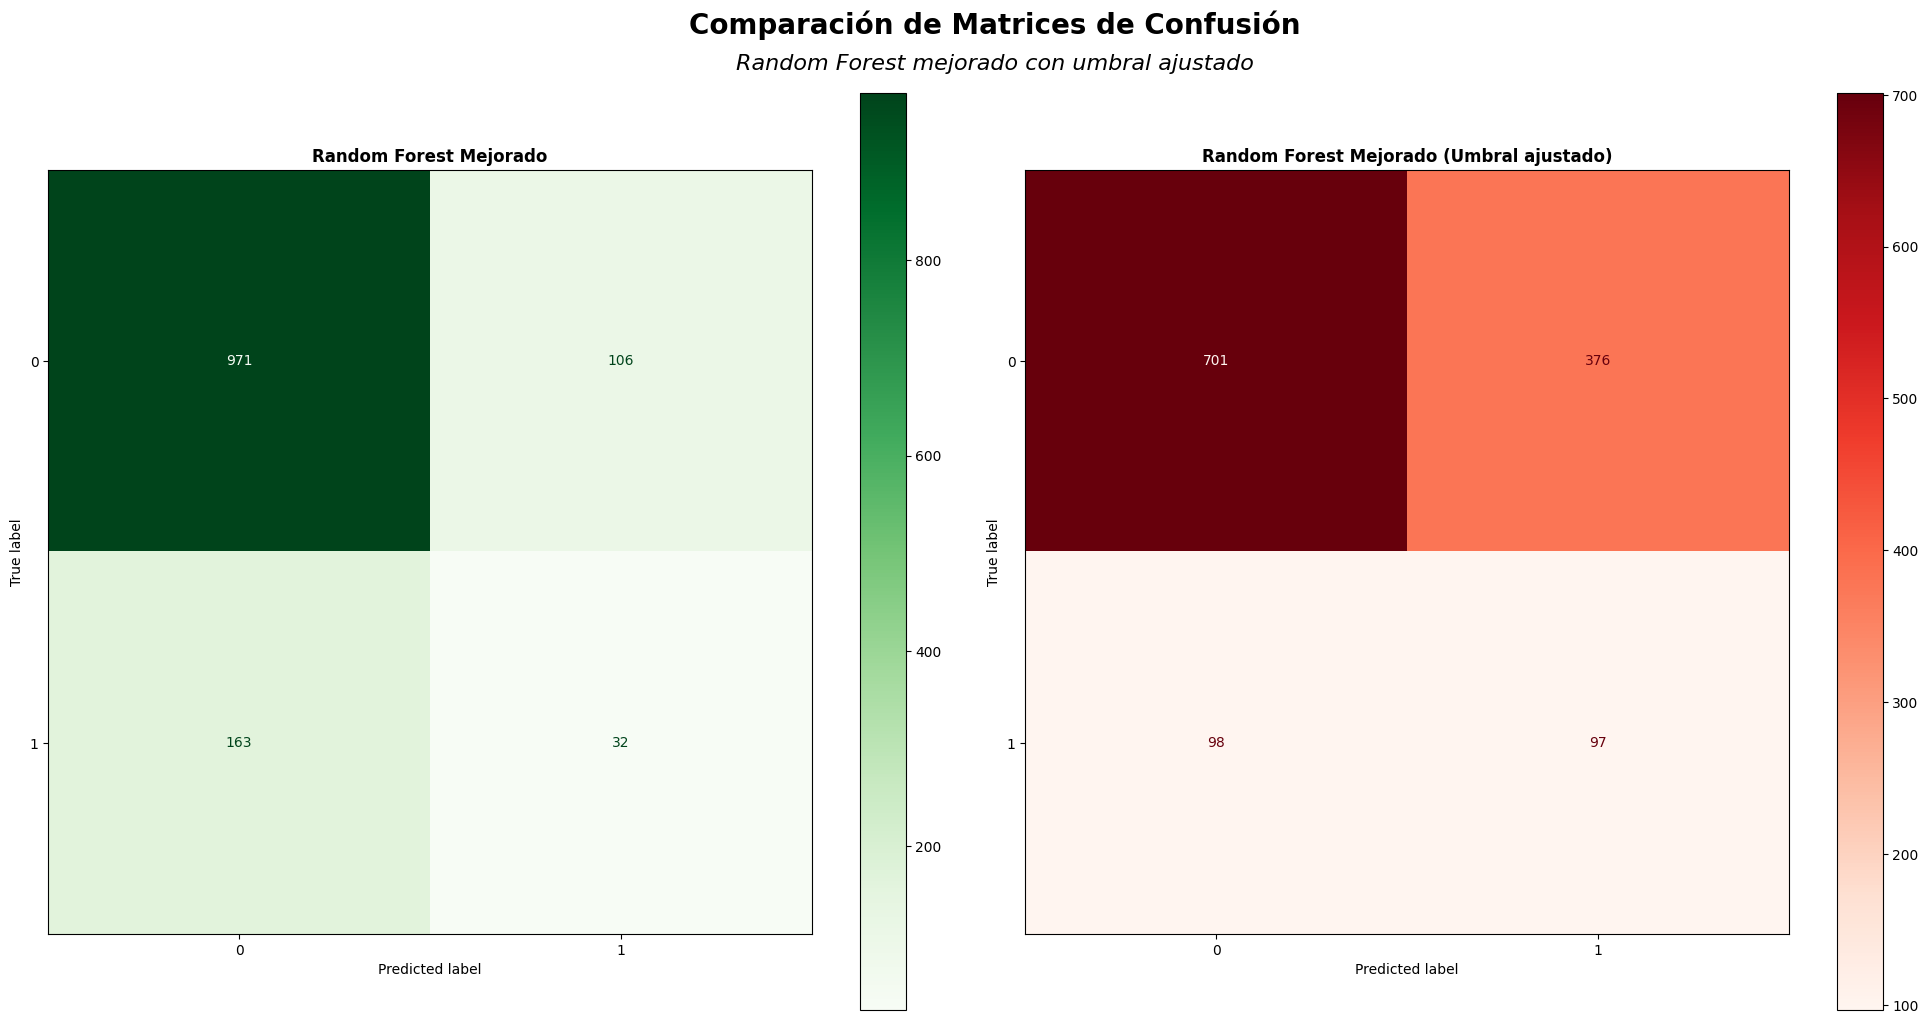

In [50]:
# Nueva matriz de confusion

# Crear la matriz de confusión
cm_RF3 = confusion_matrix(y_test, y_pred_adjusted)

# Mostrar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Random Forest mejorado

disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF2)
disp.plot(cmap=plt.cm.Greens, ax=axes[0])
axes[0].set_title('Random Forest Mejorado', fontweight='bold')

# Random Forest mejorado con umbral ajustado
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF3)
disp.plot(cmap=plt.cm.Reds, ax=axes[1])
axes[1].set_title('Random Forest Mejorado (Umbral ajustado)', fontweight='bold')

plt.suptitle('Comparación de Matrices de Confusión', fontsize=20, fontweight='bold', y=1.02)
plt.figtext(0.5, 0.96, 'Random Forest mejorado con umbral ajustado', ha='center', fontsize=16, style='italic')

# Ajustar el layout
plt.tight_layout()
plt.show()

### Análisis:

El ajuste del umbral empeora el rendimiento respecto al RF mejorado sin ajuste de umbral (78.85% vs. 62.73%). Sin embargo, tomando en cuenta las consideraciones bioéticas, es importante destacar el incremento de los verdaderos positivos y reducción significativas de los falsos negativos (en detrimento ampliamente de los falsos positivos). Poder contar con los dos modelos es importante para poder definir o incluso complementar la estrategia de screening para la predicción de ECV y posterior tratamiento preventivo (o no). Esto es, si quedarme con el RF mejorado sin ajuste de umbral que logra un mejor rendimiento, teniendo en cuenta que un 11.5% serán falsos negativos y buscar estrategias complementarias para detectar los pacientes de riesgo no identificados en el modelo de ML; o si optar por el modelo con ajuste de umbral que reduce a 6.9% los falsos negativos, comprendiendo que se deberan complementar estrategias para los falsos positivos que logre reducirlos y así, reducir el gasto médico tanto para el paciente como para el sistema de salud. 

Al respecto, un modelo que logró un desempeño similar al RF mejorado con ajuste de hiperparámetros fue SVM, sin tanto trabajo posterior como ajuste de hiperparámetros. 

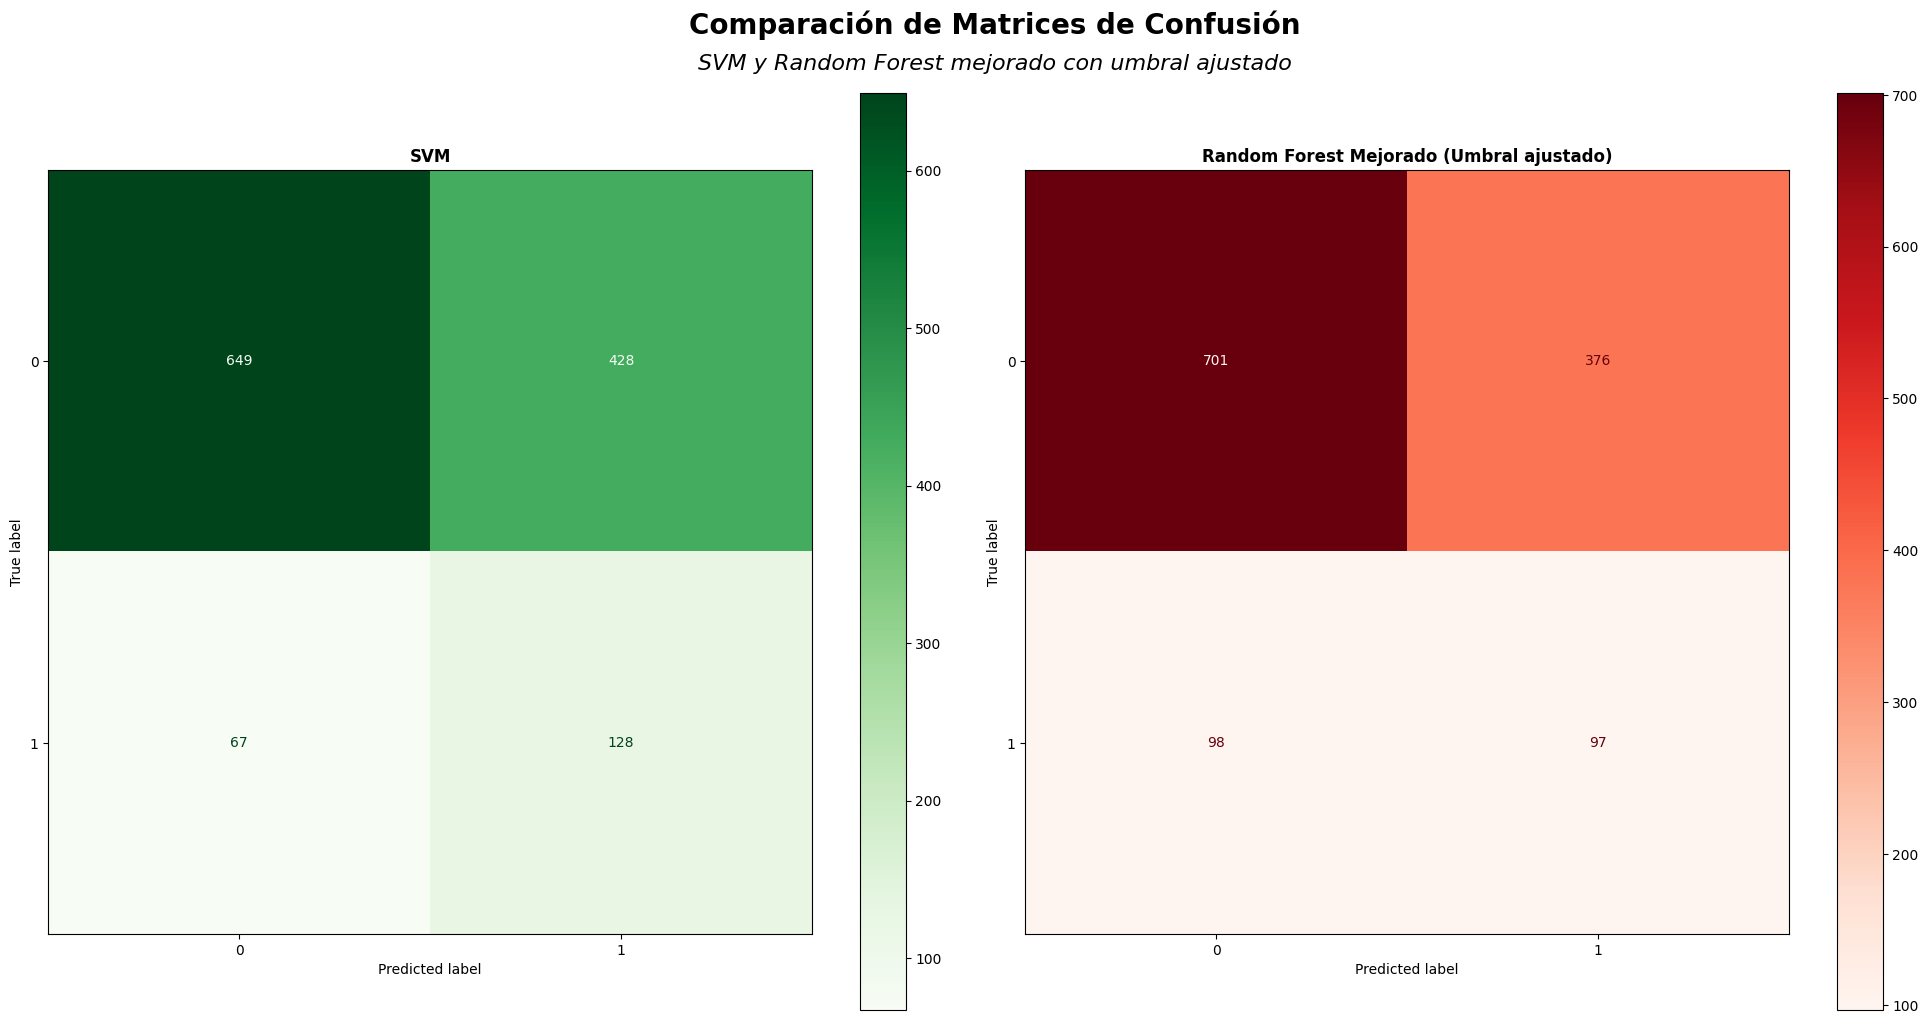

In [51]:
# Comparar la matriz de confusión de SVM utilizado anteriormente con el umbral ajustado de Random Forest

# Crear la matriz de confusión
cm_SVM2 = confusion_matrix(y_test, y_pred_svm)

# Mostrar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# SVM

disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
disp.plot(cmap=plt.cm.Greens, ax=axes[0])
axes[0].set_title('SVM', fontweight='bold')

# Random Forest mejorado con umbral ajustado
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF3)
disp.plot(cmap=plt.cm.Reds, ax=axes[1])
axes[1].set_title('Random Forest Mejorado (Umbral ajustado)', fontweight='bold')

plt.suptitle('Comparación de Matrices de Confusión', fontsize=20, fontweight='bold', y=1.02)
plt.figtext(0.5, 0.96, 'SVM y Random Forest mejorado con umbral ajustado', ha='center', fontsize=16, style='italic')

# Ajustar el layout
plt.tight_layout()
plt.show()


### **Conclusiones finales:**

El modelado con datasets desbalanceados representa un desafío, para el cual se requiere entrenamiento y conocimiento de técnicas y códigos que resuelvan su impacto negativo en el rendimiento y capacidad predictiva de los modelos. En medicina, hay varios ejemplos en donde la muestra está desbalanceada pero representan la realidad. 
Random Forest es un modelo de ML potente que con un buen hypertuning puede dar buenos resultados. Para el presente trabajo, las implicancias bioéticas de los falsos negativos es para considerar dado que un mal diagnóstico puede derivar en consecuencias médicas de gravedad. 
Será importante seguir explorando librerías y estrategias relacionadas con los dataset desbalanceados para mejorar los modelos. 